# End to End Exploratory Data Analysis Case Study

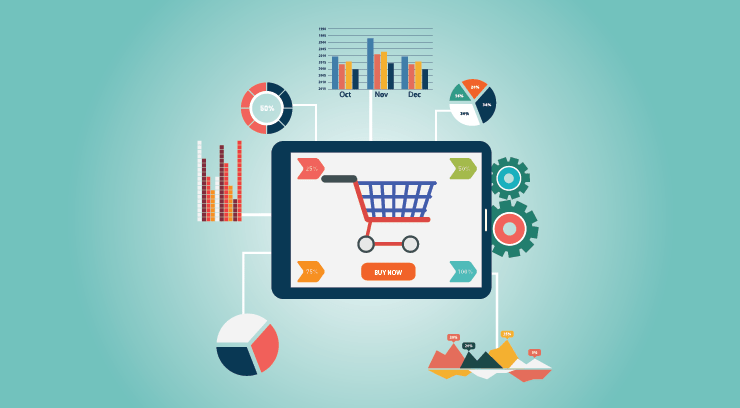

#### Data provided: Superstore data

#### Goal: **Use Superstore data to understand and deliver insights on how the company can increase its profits while minimizing the losses.**

#### *Explore and answer questions on a country level, product level, customer level and region level sales using analytics and tools you have learnt.*

#### Background: With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

#### Segment: **Retail and eCommerce Analytics**

#### Metadata:

* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.



Download the dataset from https://www.kaggle.com/datasets/vivek468/superstore-dataset-final and upload it here or use the dataset provided to you.

## Load libraries below

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd
import numpy as np 
import math 
import seaborn as sns
import os
from IPython.display import display
#from pandas_profiling import ProfileReport

plt.rcParams['figure.figsize'] = (20,10)

plt.style.use("ggplot")
%matplotlib inline 

In [2]:
DATA_DIR = "/content"
FILENAME = "SampleSuperstore.csv"

FILEPATH = os.path.join(DATA_DIR,FILENAME) #  '/content/SampleSuperstore.csv'

dataframe = pd.read_csv(FILEPATH,encoding='windows-1254')

### BASIC METDATA AND DATA EXPLORATION

In [3]:
dataframe.shape

(9994, 21)

In [4]:
dataframe.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [5]:
dataframe.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
dataframe.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])
dataframe['Ship Date'] = pd.to_datetime(dataframe['Ship Date'])
min_date = dataframe['Order Date'].min()
max_date = dataframe['Order Date'].max()

In [9]:
max_date,min_date

(Timestamp('2017-12-30 00:00:00'), Timestamp('2014-01-03 00:00:00'))

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
dataframe.describe(include='all')

<ipython-input-11-dee4c0627667>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataframe.describe(include='all')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750


In [12]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Number of null entries']).transpose().style

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Number of null entries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
dataframe.duplicated().sum()

0

Now, we will take a look at the columns into two categories: Categorical and numerical data. For this section, we will have a general understanding of the most important columns. Next section we will explore correlation among columns.

In [14]:
dataframe.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

#### Categorical columns:

* Order Date
* Ship Date
* Ship mode
* Segment
* City
* State
* Region
* Category
* Subcategory

#### Numerical columns:

* Quantity
* Sales
* Profit
* Discount

### Basic Cleaning



In [15]:
dataframe.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [16]:
dataframe['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [17]:
dataframe.drop(['Row ID','Country'],axis=1,inplace=True)

In [18]:
dataframe

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## We will analyze using a Top Down Approach

* Start with US data
* Analyze on basis of Region
* Analyze on basis of Product Category and Sub-Category
* Analyze on basis of Customer Segments
* Loss Analysis

In [19]:
dataframe.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [20]:
dataframe.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [21]:
dataframe.select_dtypes(['int64','float64'])

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028
9990,92627,91.9600,2,0.00,15.6332
9991,92627,258.5760,2,0.20,19.3932
9992,92627,29.6000,4,0.00,13.3200


In [22]:
numerical_variables = dataframe.select_dtypes(['int64','float64']).drop('Postal Code',axis=1).columns
numerical_variables = ['Sales','Quantity','Discount','Profit']
correlations = dataframe[numerical_variables].corr(method='spearman')

In [23]:
dataframe[numerical_variables].corr(method='spearman')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.327426,-0.056969,0.518407
Quantity,0.327426,1.000000,-0.000878,0.234491
Discount,-0.056969,-0.000878,1.000000,-0.543350
Profit,0.518407,0.234491,-0.543350,1.000000


## Question: How does the superstore's profit and sales look over time?

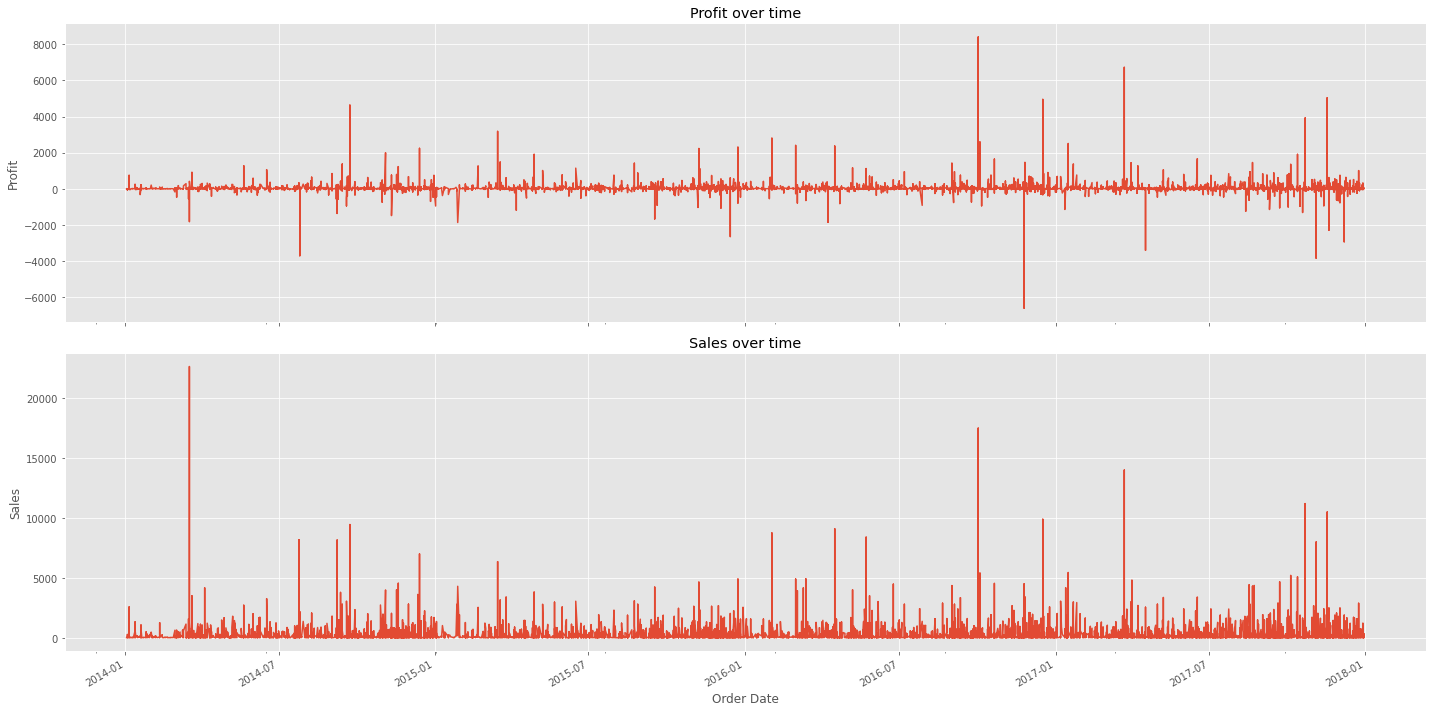

In [24]:
fig,ax = plt.subplots(2,1,figsize=(20,10),sharex=True)

dataframe.set_index('Order Date')['Profit'].plot(ax=ax[0])
ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('Profit')
ax[0].set_title('Profit over time')

dataframe.set_index('Order Date')['Sales'].plot(ax=ax[1])
ax[1].set_xlabel('Order Date')
ax[1].set_ylabel('Sales')
ax[1].set_title('Sales over time')
fig.tight_layout()

In [25]:
dataframe['order_date_year_month'] = dataframe['Order Date'].apply(lambda x: x.strftime('%Y%m'))
dataframe['order_date_year'] = dataframe['Order Date'].dt.year
dataframe['order_date_year_quarter'] = dataframe['Order Date'].dt.year.astype(str) + '_'+dataframe['Order Date'].dt.quarter.astype(str)

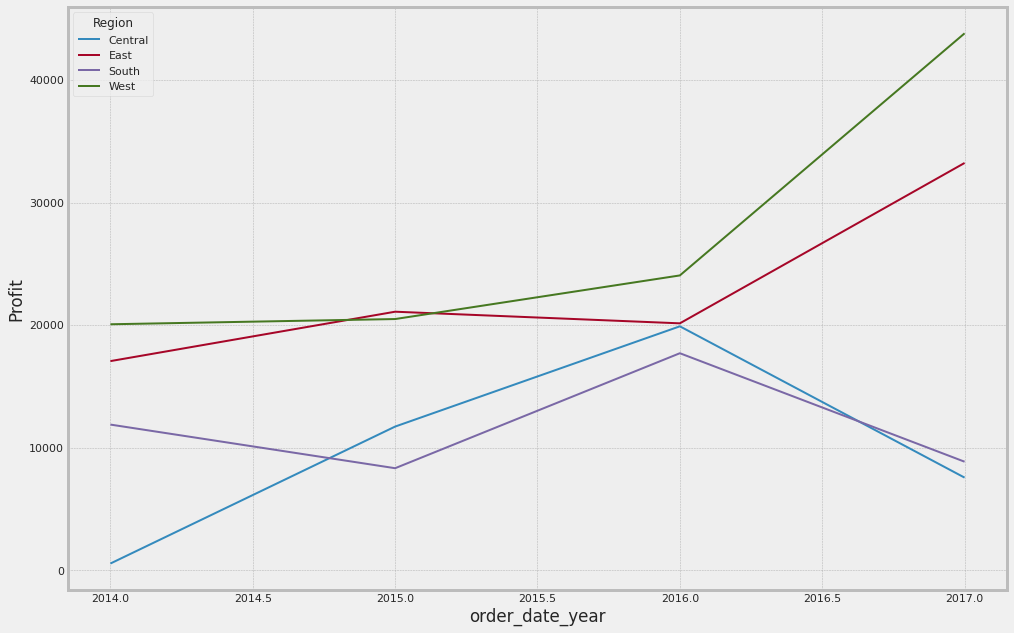

In [91]:
plt.figure(figsize=(15,10))
test = dataframe.groupby(['order_date_year','Region'])['Profit'].sum().reset_index()
sns.lineplot(x = 'order_date_year',y = 'Profit',hue='Region',data=test,ci=False)

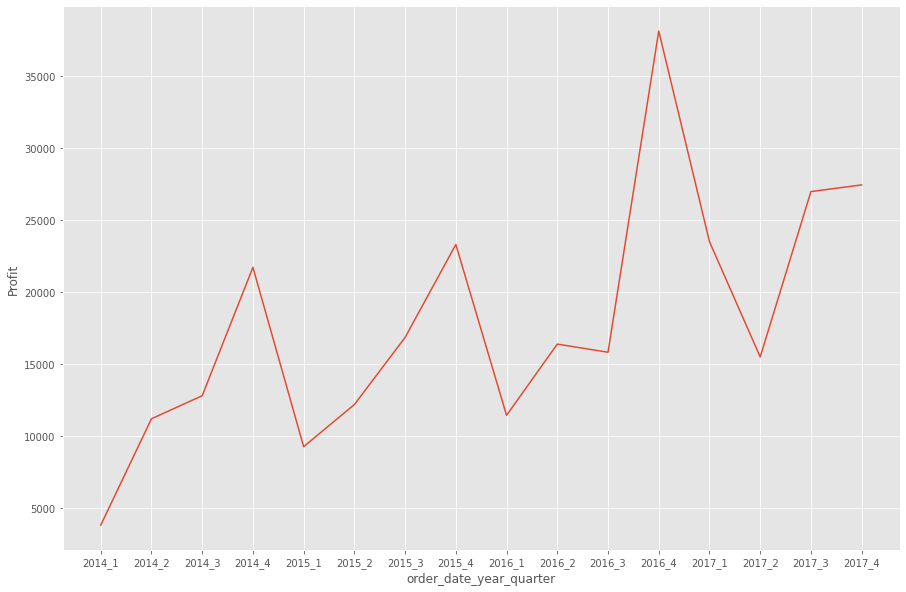

In [27]:
plt.figure(figsize=(15,10))
test = dataframe.groupby('order_date_year_quarter')['Profit'].sum().reset_index()
sns.lineplot(x = 'order_date_year_quarter',y = 'Profit',data=test,ci=False)

(-2000.0, 4000.0)

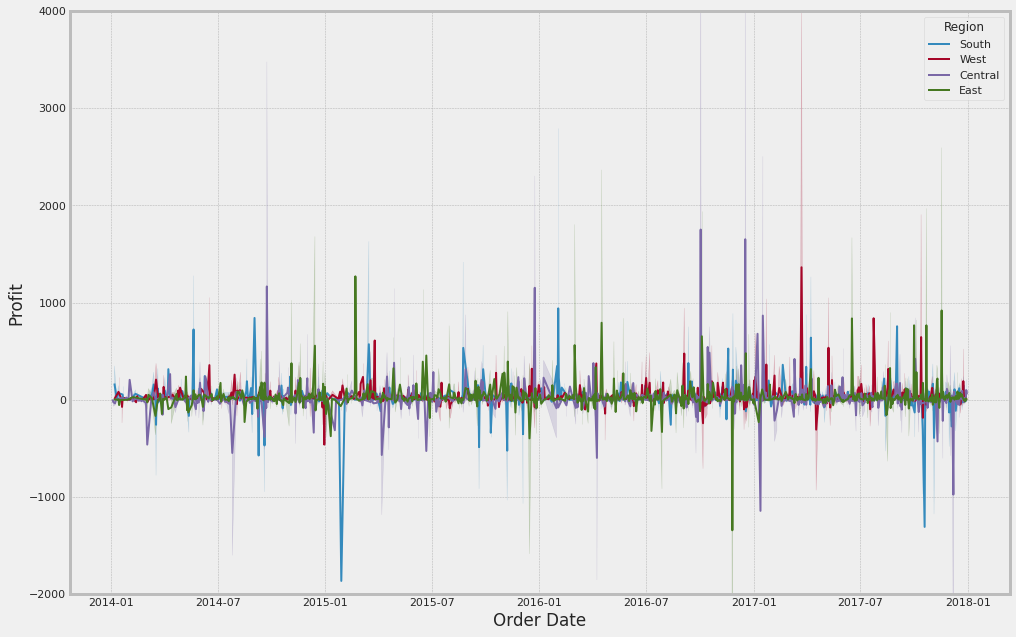

In [92]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'Order Date',y = 'Profit',hue='Region',data=dataframe)
plt.ylim(-2000,4000)

* There have been a fair share of high profit spikes between 2016 and 2018 with a few underwhelming loss spikes too.
* There was a huge sale spike in the month of April or May of 2014, followed by consistentency and small spikes throughout the time.

#### Question: What numerical variables are correlated and how?

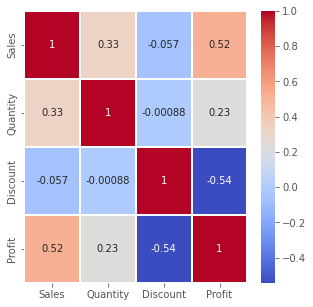

In [29]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

sns.heatmap(correlations,annot=True,linewidth=1.2,fmt='1.2g',ax=ax,cmap='coolwarm')

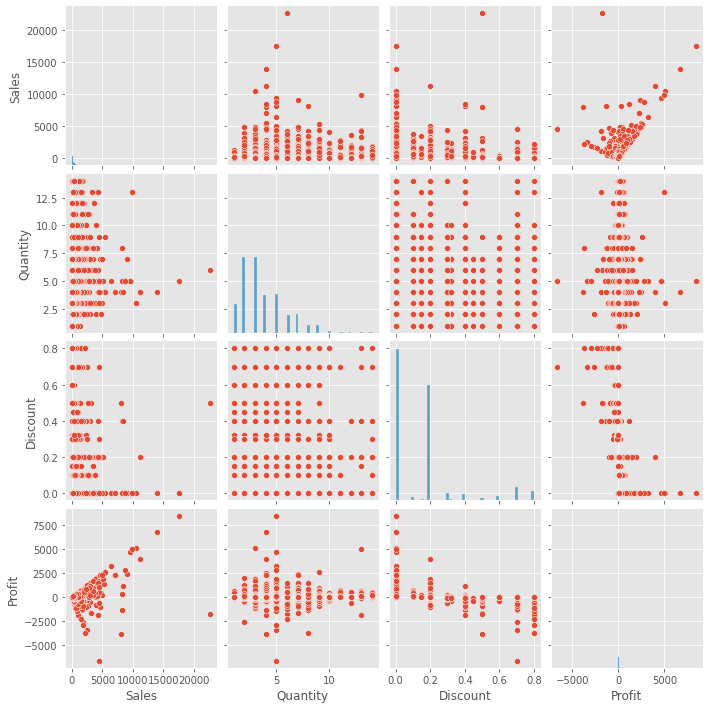

In [30]:
sns.pairplot(dataframe[numerical_variables])

#### Question: What is the distribution of shipping mode ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


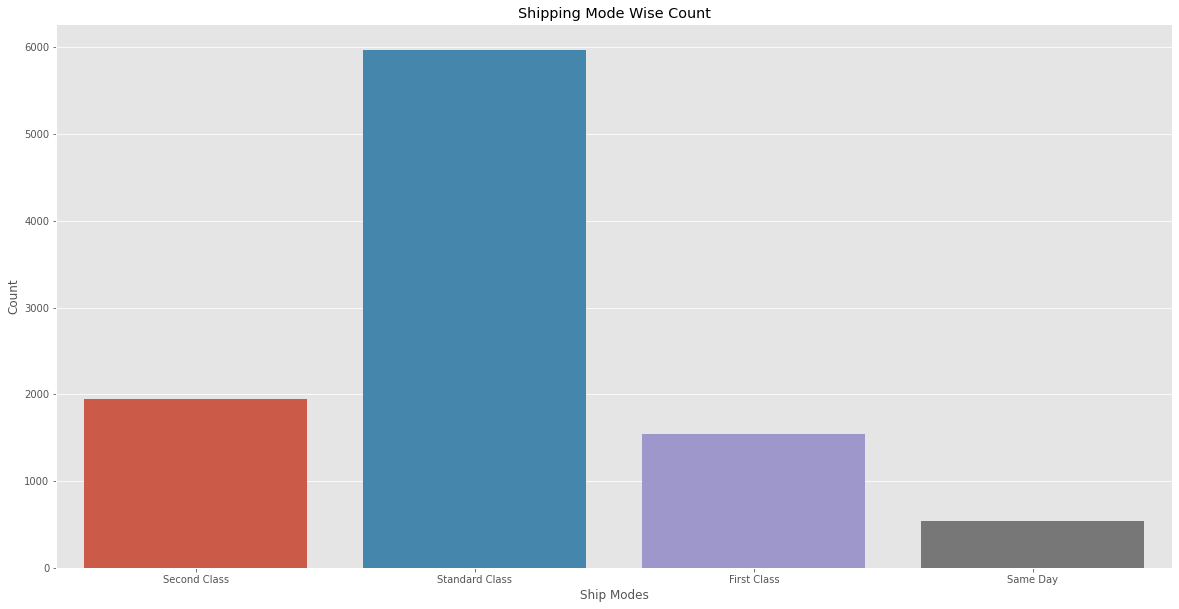

In [31]:
# Shipping Mode wise sales

fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(dataframe['Ship Mode'])
plt.title('Shipping Mode Wise Count')
plt.ylabel('Count')
plt.xlabel('Ship Modes')
plt.show()

# Standard Class shipping method is the highest which is 12 times higher than same day. 
# if they decrease the price of the other shipping method that could increase the customer satisfaction

* Number of Standard Class shipping deliveries has the highest counts in the dataset, much much more than Same Day deliveries

#### Question: What is the distribution of Region ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


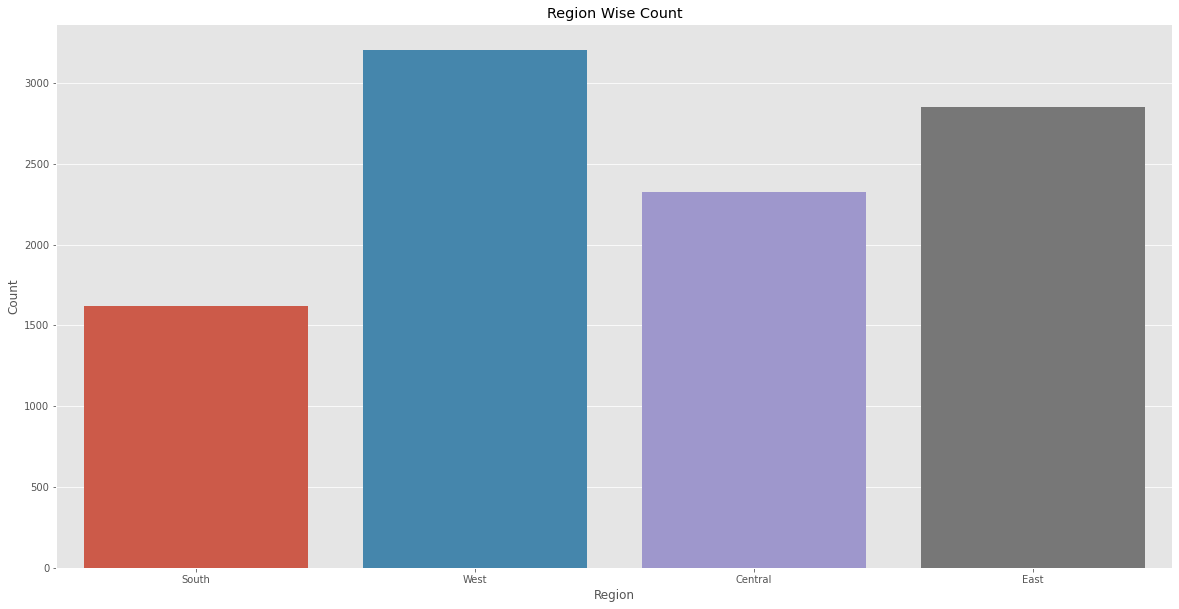

In [32]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(dataframe['Region'])
plt.title('Region Wise Count')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

Seems like West Region Sales have the most instances followed by the East. Maybe showing that the superstore receives more demand from the coasts of the United States 

#### Question: What is the distribution of the sub category of products?

In [33]:
fig = px.pie(dataframe['Sub-Category'], values=dataframe['Sub-Category'].value_counts().values,names=dataframe['Sub-Category'].value_counts().index,title="Distribution of SubCategories")
fig.show()

#### This superstore seems to be have the largest chunk of orders coming from Binders and Papers.

#### Question: How do the category of products encompass the sub categories?

In [34]:
pd.crosstab(dataframe['Category'],dataframe['Sub-Category'])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,228,617,0,0,0,957,0,0,0,0,0,0,319
Office Supplies,0,466,796,1523,0,0,0,254,217,0,364,0,1370,0,846,190,0
Technology,775,0,0,0,0,0,68,0,0,0,0,115,0,889,0,0,0


This store focuses on Furniture, Office Supplies and Technology. Large number of instances come from Office Supplies. But do the sales come from them? Let's have a look soon.

#### Question: Given the shipping mode, what would be the total and average sales?

In [35]:
dataframe.groupby('Ship Mode')['Sales'].agg([np.mean,np.sum])

,mean,sum
Ship Mode,,
First Class,228.497024,3.514284e+05
Same Day,236.396179,1.283631e+05
Second Class,236.089239,4.591936e+05
Standard Class,227.583067,1.358216e+06


 Most of the Sales seem to be coming from Standard Class of Shipping

 Let's plot the average sales by shipping mode and look at the variability using error bars.

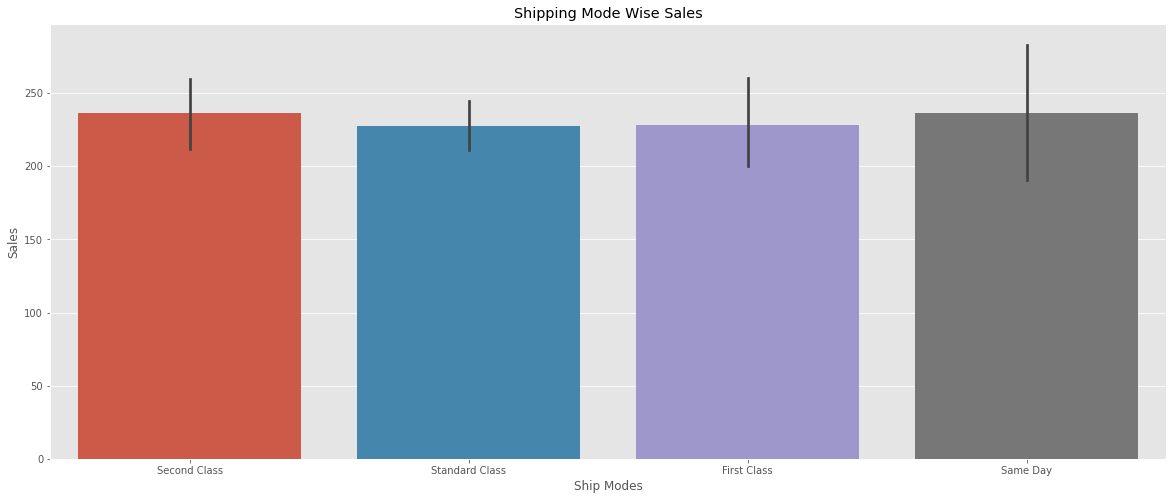

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(data = dataframe,x='Ship Mode',y='Sales')
plt.title('Shipping Mode Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Ship Modes')
plt.show()

When we look at the average sales all the shipping mode have almost similar sales.

#### Question: Given the shipping mode, what would be the total and average Profit?

In [37]:
dataframe.groupby('Ship Mode')['Profit'].agg([np.mean,np.sum])

,mean,sum
Ship Mode,,
First Class,31.839948,48969.8399
Same Day,29.266591,15891.7589
Second Class,29.535545,57446.6354
Standard Class,27.494770,164088.7875


 The profit seems to be coming majorly from Standard Class Shipping.

 Let's plot the average profit by shipping mode and look at the variability using error bars.

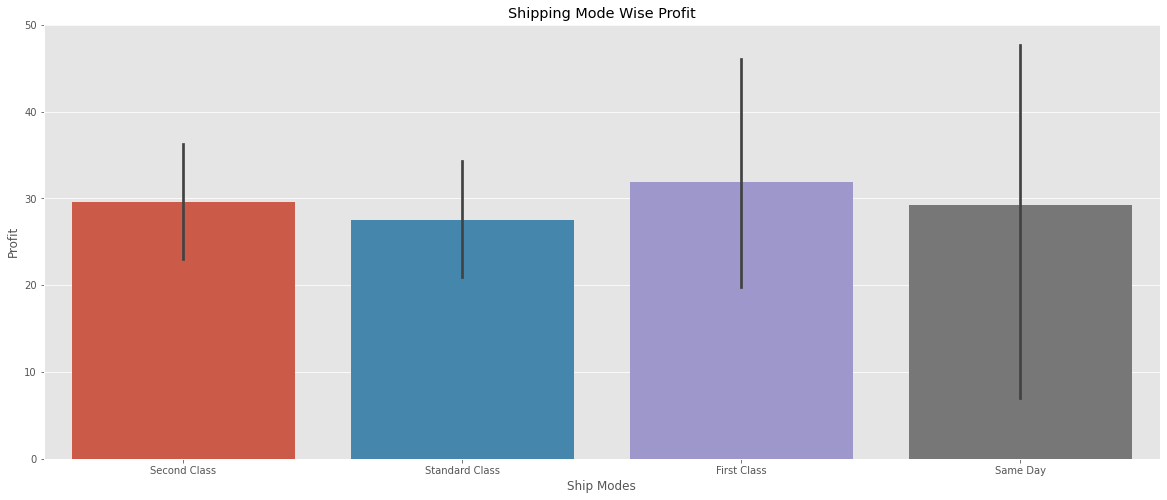

In [38]:
plt.figure(figsize=(20,8))
sns.barplot(data = dataframe,x='Ship Mode',y='Profit')
plt.title('Shipping Mode Wise Profit')
plt.ylabel('Profit')
plt.xlabel('Ship Modes')
plt.show()

On an Average First Class and Second Class Shipping have most profits

#### Question: What about Region wise distribution of Sales and Profits?

In [39]:
dataframe.groupby('Region')['Sales'].agg([np.mean,np.sum])

,mean,sum
Region,,
Central,215.772661,501239.8908
East,238.336110,678781.2400
South,241.803645,391721.9050
West,226.493233,725457.8245


The West and the East have majority of Sales Partitioning.

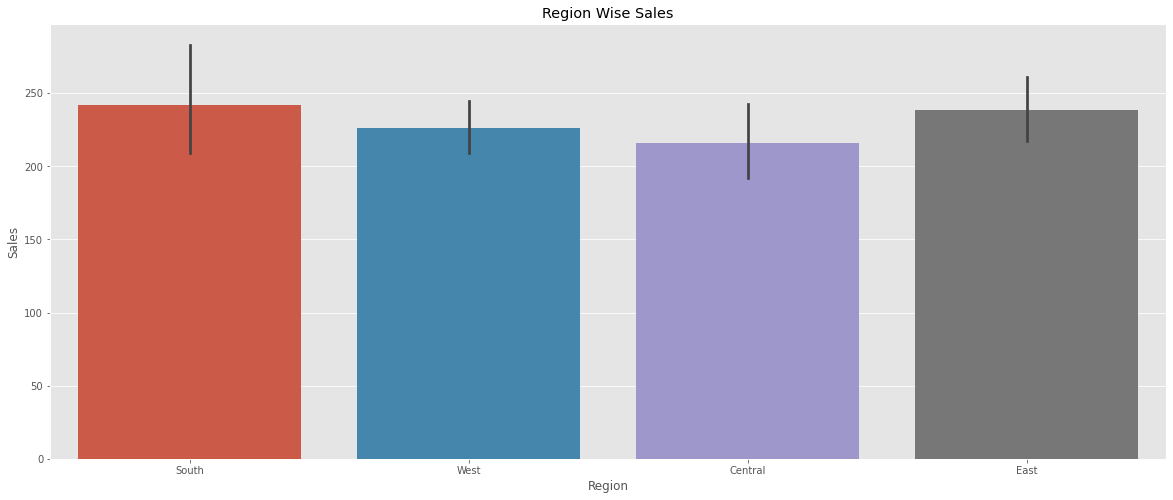

In [40]:
plt.figure(figsize=(20,8))
sns.barplot(data = dataframe,x='Region',y='Sales')
plt.title('Region Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.show()

In [41]:
dataframe.groupby('Region')['Profit'].agg([np.mean,np.sum])

,mean,sum
Region,,
Central,17.092709,39706.3625
East,32.135808,91522.7800
South,28.857673,46749.4303
West,33.849032,108418.4489


Profits too! The Coasts glean most of the profits for the Store company

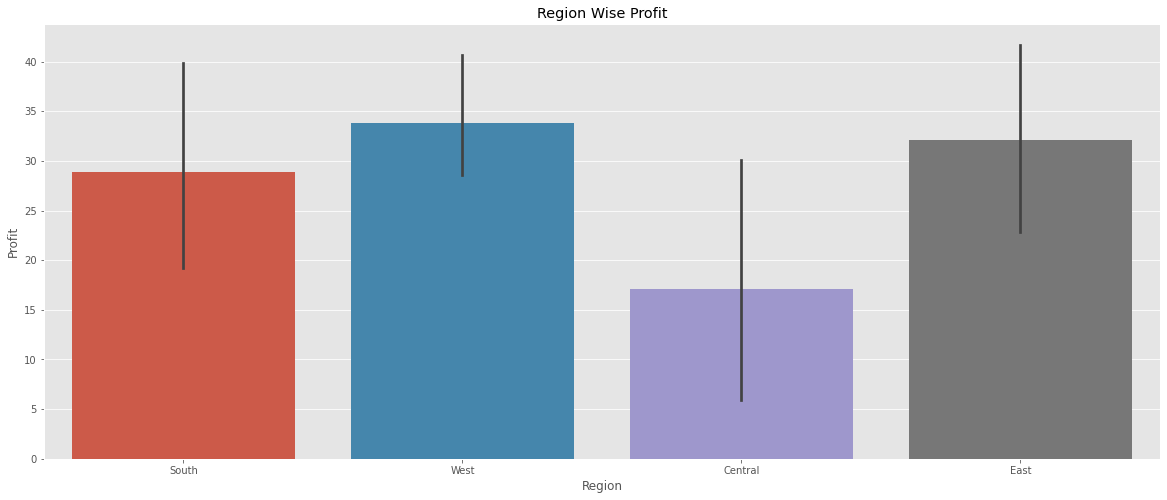

In [42]:
plt.figure(figsize=(20,8))
sns.barplot(data = dataframe,x='Region',y='Profit')
plt.title('Region Wise Profit')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.show()

#### Question : Which is the most popular category of products?

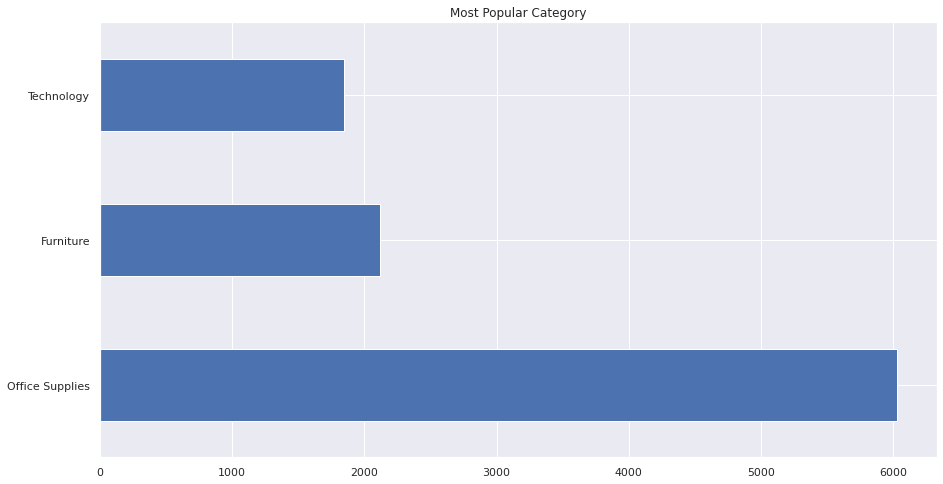

In [43]:
sns.set(rc = {'figure.figsize':(15,8)})

dataframe['Category'].value_counts().plot(kind='barh',title='Most Popular Category')

#### Question : Since we looked at products, how about product segments? How do they look?

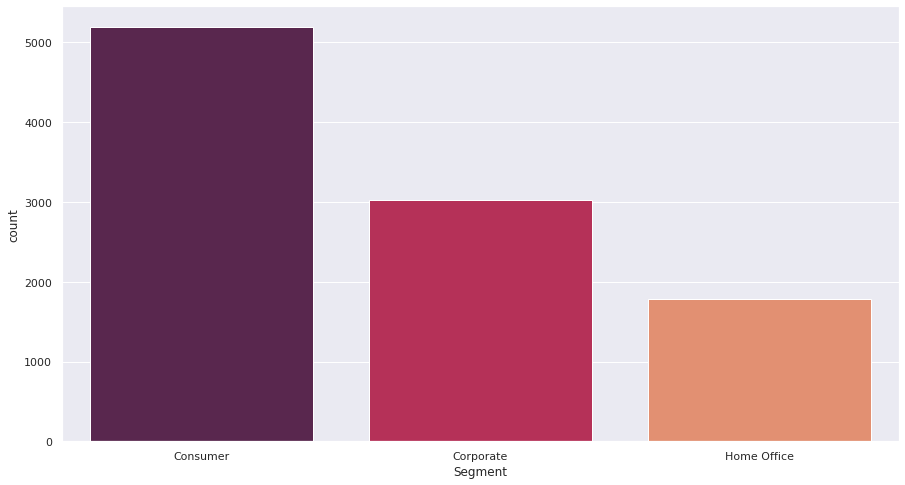

In [44]:
sns.countplot(x=dataframe['Segment'],palette='rocket')

#### Question: Since Consumer Segments are most popular, how are the distributed on Region basis, Shipping Mode basis and Product Category basis? Let's plot for Sub - Category basis and check sales.

In [95]:
pd.crosstab(dataframe['Segment'],dataframe['Region'],normalize = 'all')

Region,Central,East,South,West
Segment,,,,
Consumer,0.121273,0.146988,0.083850,0.167300
Corporate,0.067340,0.087753,0.051031,0.096058
Home Office,0.043826,0.050230,0.027216,0.057134


In [46]:
pd.crosstab(dataframe['Segment'],dataframe['Ship Mode'])

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,769,317,1020,3085
Corporate,485,114,609,1812
Home Office,284,112,316,1071


In [47]:
pd.crosstab(dataframe['Segment'],dataframe['Category'])

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,1113,3127,951
Corporate,646,1820,554
Home Office,362,1079,342


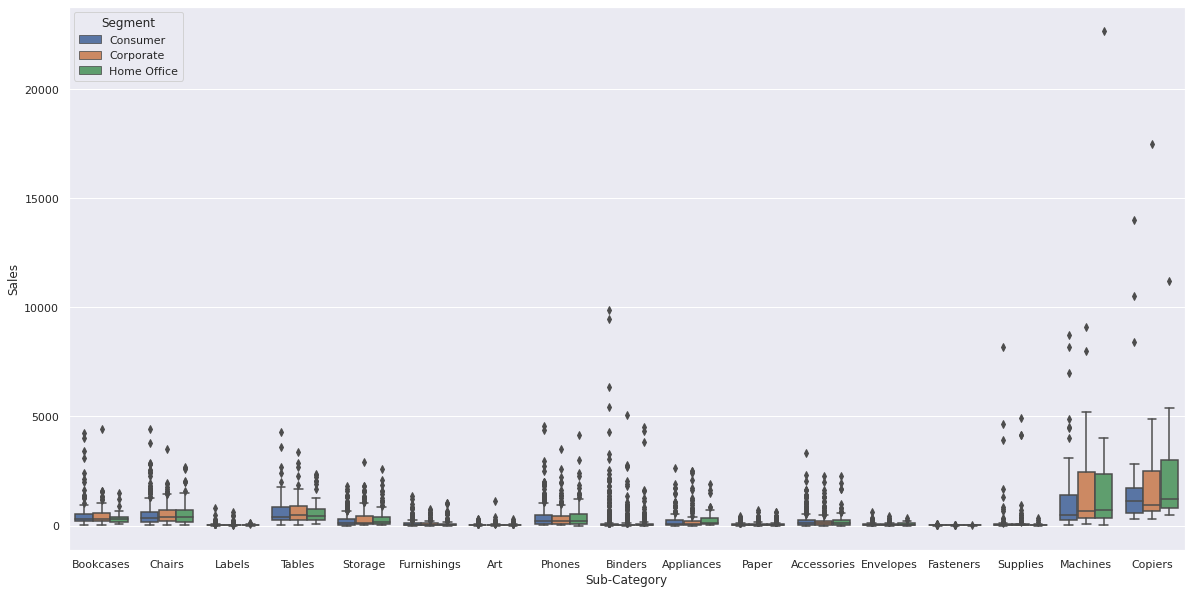

In [48]:
plt.figure(figsize = (20,10))

sns.boxplot(x = 'Sub-Category',y='Sales',hue='Segment',data=dataframe)

#### Question: Given product category, look at total sales, profts and quantity sold

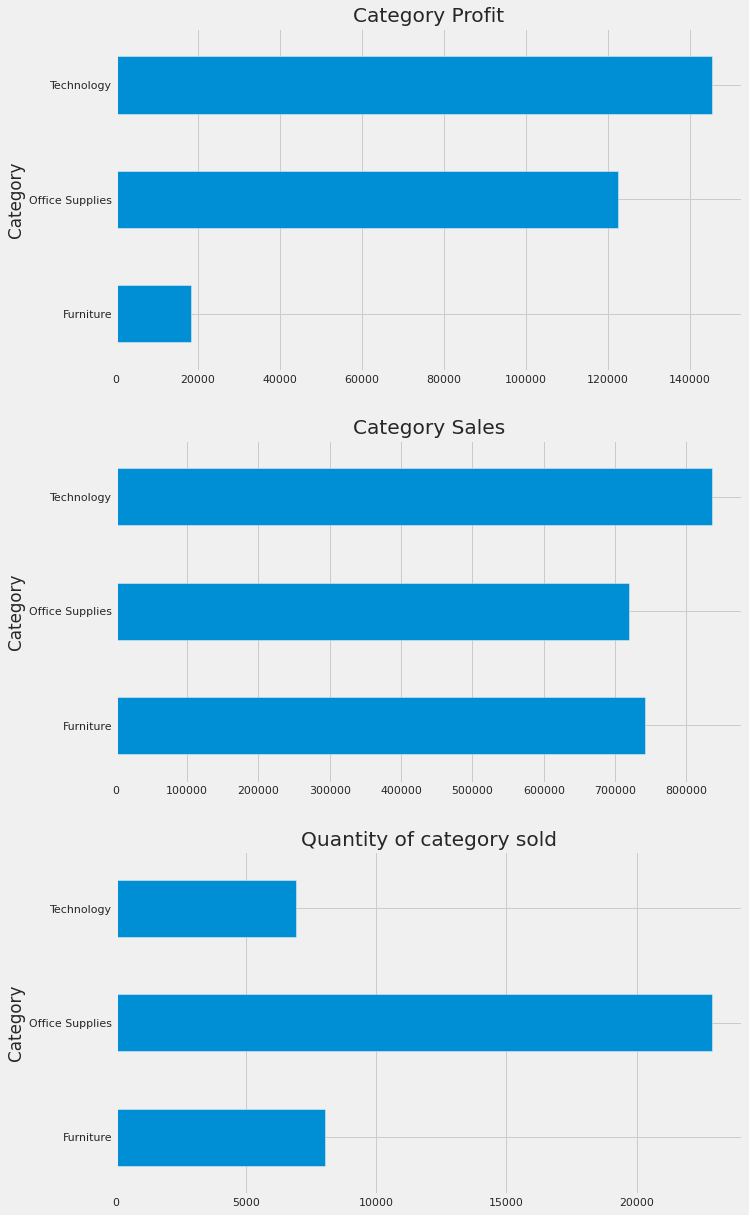

In [49]:
plt.style.use('fivethirtyeight')

fig,ax= plt.subplots(3,1,figsize=(10,20))


dataframe.groupby('Category')['Profit'].sum().plot(kind='barh',title='Category Profit',ax=ax[0])
dataframe.groupby('Category')['Sales'].sum().plot(kind='barh',title='Category Sales',ax=ax[1])
dataframe.groupby('Category')['Quantity'].sum().plot(kind='barh',title='Quantity of category sold',ax=ax[2])

#### Question: Now given product sgements, look at total sales, profts and quantity sold

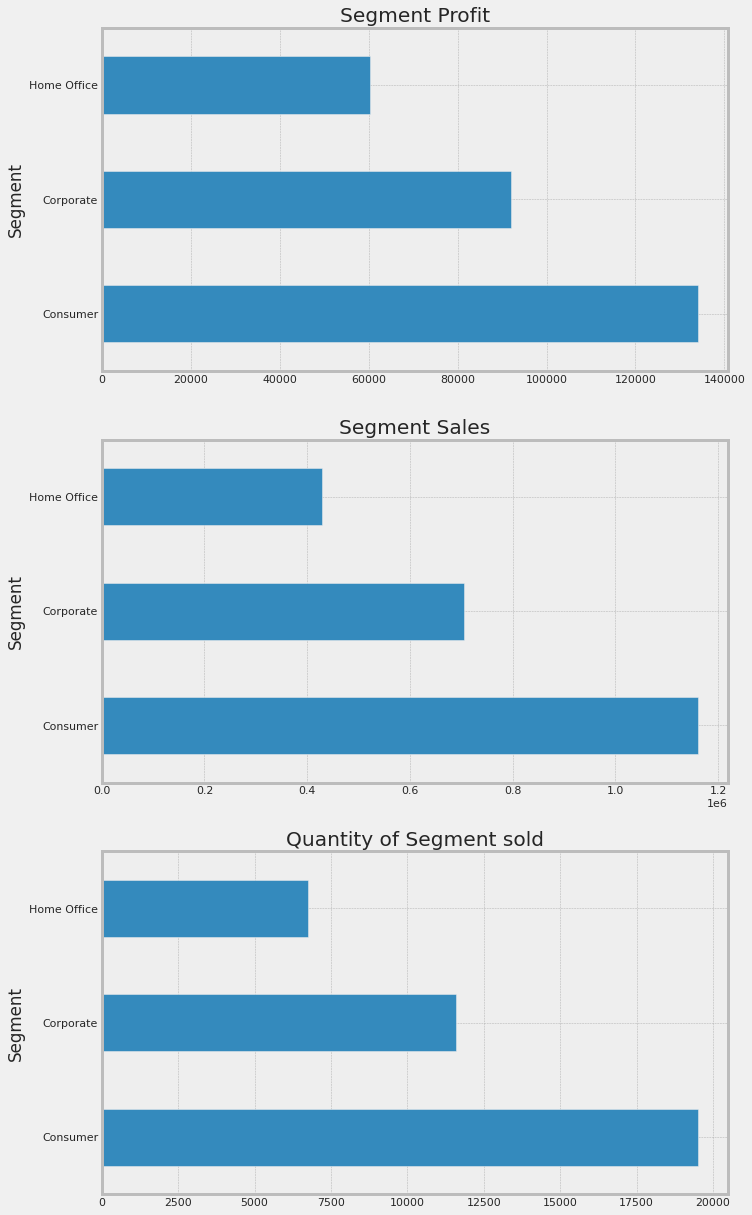

In [50]:
plt.style.use('bmh')

fig,ax= plt.subplots(3,1,figsize=(10,20))


dataframe.groupby('Segment')['Profit'].sum().plot(kind='barh',title='Segment Profit',ax=ax[0])
dataframe.groupby('Segment')['Sales'].sum().plot(kind='barh',title='Segment Sales',ax=ax[1])
dataframe.groupby('Segment')['Quantity'].sum().plot(kind='barh',title='Quantity of Segment sold',ax=ax[2])

#### Question: Given product sub-category, look at total sales, profts and quantity sold

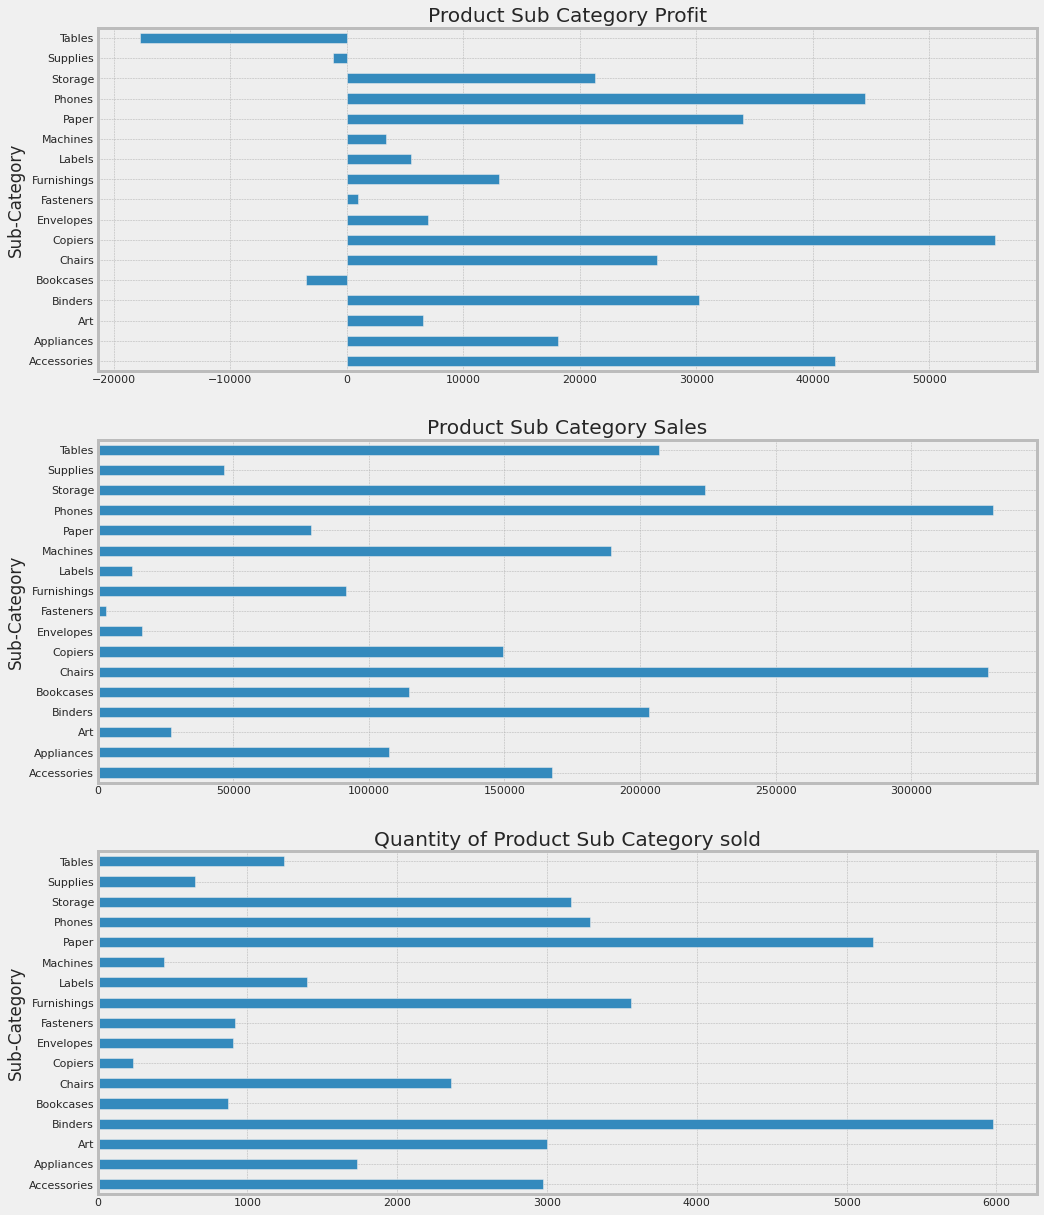

In [51]:
plt.style.use('bmh')

fig,ax= plt.subplots(3,1,figsize=(15,20))


dataframe.groupby('Sub-Category')['Profit'].sum().plot(kind='barh',title='Product Sub Category Profit',ax=ax[0])
dataframe.groupby('Sub-Category')['Sales'].sum().plot(kind='barh',title='Product Sub Category Sales',ax=ax[1])
dataframe.groupby('Sub-Category')['Quantity'].sum().plot(kind='barh',title='Quantity of Product Sub Category sold',ax=ax[2])

#### Question: Given product category and sub category, look at percentage of Profit off the Sales generated

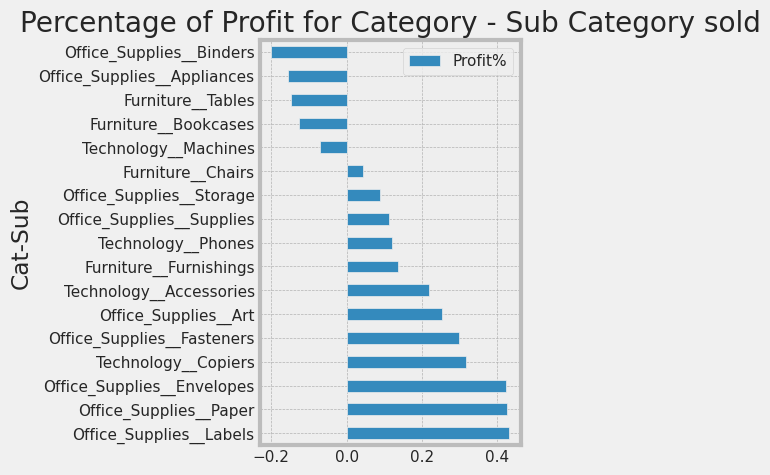

In [96]:
plt.style.use('bmh')

fig,ax= plt.subplots(1,1,figsize=(3,5),dpi=100)
dataframe['Profit%'] = dataframe['Profit']/dataframe['Sales']
dataframe['Cost'] = dataframe['Sales'] - dataframe['Profit']
dataframe['Cat-Sub'] = dataframe['Category'].astype(str).str.replace(" ","_") +'__'+dataframe['Sub-Category'].astype(str)
dataframe.groupby('Cat-Sub')[['Profit%']].mean().sort_values(by='Profit%',ascending=False).plot(kind='barh',title='Percentage of Profit for Category - Sub Category sold',ax=ax)

#### Question: Distribution of total Profit by Region

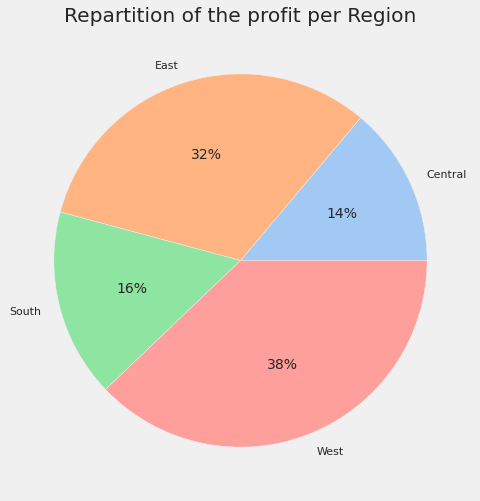

In [53]:
labels = dataframe.groupby('Region')['Profit'].sum().index
values = dataframe.groupby('Region')['Profit'].sum().values

colors = sns.color_palette('pastel')[0:4]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the profit per Region")
plt.show()

## Question: Distribution of Total Profit for every Product Category by Region

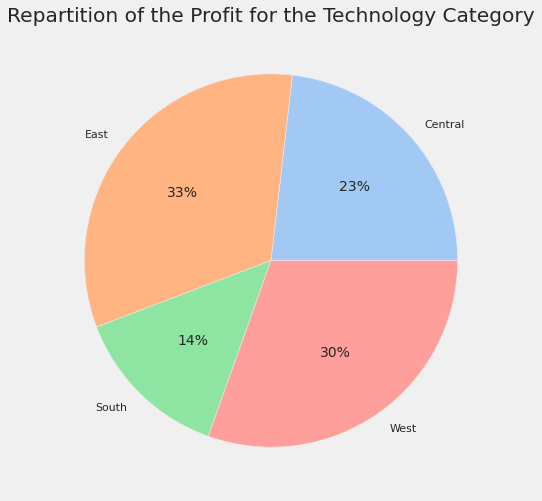

In [54]:
A = dataframe[dataframe['Category'] == 'Technology']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the Technology Category")
plt.show()

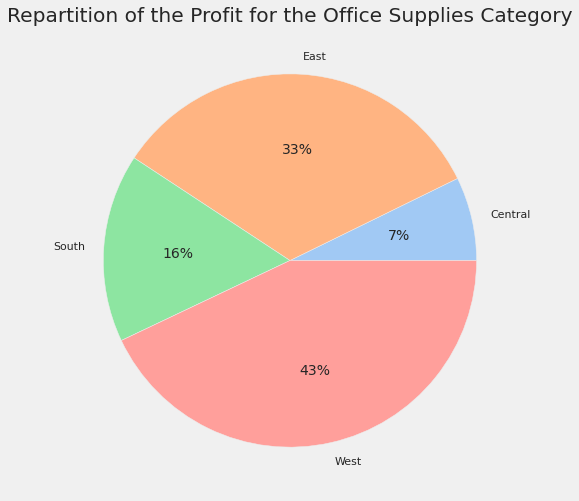

In [55]:
A = dataframe[dataframe['Category'] == 'Office Supplies']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the Office Supplies Category")
plt.show()

In [56]:
A = dataframe[dataframe['Category'] == 'Furniture']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

fig = px.pie(A, values=values,names=
labels,title="Repartition of the Profit for the Furniture Category")
fig.show()

#### Question: Which category-sub category of products are generating most and least profit by Region?

In [57]:
dataframe.groupby(['Region','Cat-Sub'])[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False)

Profit      Sales
Region  Cat-Sub                                           
West    Technology__Copiers          19327.2351  49749.242
East    Technology__Copiers          17022.8418  53219.462
West    Technology__Accessories      16484.5983  61114.116
        Office_Supplies__Binders     16096.8016  55961.113
Central Technology__Copiers          15608.8413  37259.570
...                                         ...        ...
        Office_Supplies__Appliances  -2638.6175  23582.033
        Furniture__Tables            -3559.6504  39154.971
        Furniture__Furnishings       -3906.2168  15254.370
South   Furniture__Tables            -4623.0579  43916.192
East    Furniture__Tables           -11025.3801  39139.807

[68 rows x 2 columns]

#### Question: Which category-sub category of products are generating most and least profit by Shipping Mode?

In [59]:
dataframe.groupby(['Ship Mode','Cat-Sub'])[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False)

Profit        Sales
Ship Mode      Cat-Sub                                          
Standard Class Technology__Copiers       31354.6204   83698.9040
               Technology__Phones        25953.3506  197147.7220
               Technology__Accessories   23428.8608   93803.4160
               Office_Supplies__Binders  19491.9967  134320.0730
               Office_Supplies__Paper    19478.8185   45160.2620
...                                             ...          ...
First Class    Furniture__Tables         -1365.3665   28800.7760
               Technology__Machines      -1603.4990   24153.4010
Standard Class Furniture__Bookcases      -2531.1028   68536.8825
Second Class   Furniture__Tables         -3320.6799   43693.7475
Standard Class Furniture__Tables        -11910.0122  124826.6615

[68 rows x 2 columns]

#### Question: Which category-sub category of products are generating most and least profit by Region and Shipping Mode?

In [60]:
dataframe.groupby(['Region','Ship Mode','Cat-Sub'])[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False)

Profit       Sales
Region  Ship Mode      Cat-Sub                                            
Central Standard Class Technology__Copiers          14339.8713  33939.6500
East    Standard Class Technology__Copiers          10985.8923  32719.6600
West    First Class    Technology__Copiers          10093.4066  23209.7520
        Standard Class Technology__Accessories       9902.1470  38081.4800
                       Office_Supplies__Binders      9010.8882  33221.5450
...                                                        ...         ...
South   Standard Class Furniture__Tables            -2661.6425  23720.2595
Central Standard Class Office_Supplies__Appliances  -2816.9207  13577.0660
East    First Class    Technology__Machines         -3514.4562   5186.5490
South   Same Day       Technology__Machines         -3839.9904   7999.9800
East    Standard Class Furniture__Tables            -6942.6050  23287.5990

[269 rows x 2 columns]

#### Question: Which category-sub category of products are generating most and least profit by Segment?

In [61]:
dataframe.groupby(['Segment','Cat-Sub'])[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False)

Profit        Sales
Segment     Cat-Sub                                             
Consumer    Technology__Copiers          24083.7106   69819.0700
            Technology__Phones           23837.1147  169932.7640
            Technology__Accessories      20735.9225   87105.2380
Corporate   Technology__Copiers          18990.2789   46829.3860
Consumer    Office_Supplies__Binders     17995.5972  118161.0090
            Office_Supplies__Paper       15534.6436   36324.3680
            Furniture__Chairs            13235.3319  172862.7420
Corporate   Technology__Accessories      12707.4805   48190.5640
Home Office Technology__Copiers          12543.8354   32879.5740
Corporate   Technology__Phones           11766.2196   91153.4140
            Office_Supplies__Paper       10361.5468   23883.1300
            Office_Supplies__Storage      9131.0247   79790.9980
Home Office Technology__Phones            8912.3963   68920.8760
            Technology__Accessories       8493.2327   32084.5160
Corporate   Furniture__Chairs             8344.6565   99140.8780
Home Office Office_Supplies__Paper        8157.3789   18271.7080
Consumer    Furniture__Furnishings        7919.4227   49620.0460
Corporate   Office_Supplies__Appliances   7429.8952   36588.6830
Consumer    Office_Supplies__Storage      7104.2004  100492.4020
            Office_Supplies__Appliances   6981.9282   52819.5810
Corporate   Office_Supplies__Binders      6377.3201   51560.3130
Home Office Office_Supplies__Binders      5848.8460   33691.4110
            Office_Supplies__Storage      5043.6013   43560.2080
            Furniture__Chairs             5010.1779   56445.4830
            Office_Supplies__Appliances   3726.1820   18123.8970
Corporate   Furniture__Furnishings        3508.2077   25001.2660
Consumer    Office_Supplies__Art          3454.3011   14251.9300
            Office_Supplies__Envelopes    3264.4126    7771.1460
            Office_Supplies__Labels       3075.9884    6709.2620
Corporate   Office_Supplies__Envelopes    2571.2290    5942.6700
Consumer    Technology__Machines          2141.0618   79542.8250
Corporate   Office_Supplies__Art          2004.6477    8590.4480
            Office_Supplies__Labels       1760.8273    4101.6460
Home Office Furniture__Furnishings        1631.5132   17083.8520
            Office_Supplies__Envelopes    1128.5351    2762.5860
            Office_Supplies__Art          1068.8382    4276.4140
            Office_Supplies__Labels        709.4383    1675.4040
Corporate   Technology__Machines           703.0190   60276.7550
            Furniture__Bookcases           638.4502   34005.9243
Consumer    Office_Supplies__Fasteners     576.8008    1680.9420
Home Office Technology__Machines           540.6761   49419.0510
Corporate   Office_Supplies__Supplies      338.9264   19435.2840
Home Office Furniture__Bookcases           324.6320   12241.3430
Corporate   Office_Supplies__Fasteners     251.9030     783.2900
Home Office Office_Supplies__Supplies      129.5254    1496.7580
            Office_Supplies__Fasteners     120.8144     560.0480
Consumer    Office_Supplies__Supplies    -1657.5513   25741.4960
Home Office Furniture__Tables            -3090.9447   36160.0195
Consumer    Furniture__Bookcases         -4435.6382   68632.7290
Corporate   Furniture__Tables            -4906.4986   70871.7175
Consumer    Furniture__Tables            -9728.0378   99933.7950

#### Question: Which category-sub category of products are generating most and least profit by Region and Segment?

In [62]:
dataframe.groupby(['Region','Segment','Cat-Sub'])[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False)

Profit      Sales
Region  Segment     Cat-Sub                                           
Central Corporate   Technology__Copiers          12789.9043  29679.742
West    Consumer    Technology__Copiers          12158.8713  30459.612
                    Technology__Accessories       8964.1511  33530.314
East    Consumer    Technology__Copiers           8657.9325  30399.706
West    Consumer    Office_Supplies__Binders      7838.6780  28227.120
...                                                     ...        ...
        Home Office Technology__Machines         -3772.5814  11241.208
Central Consumer    Office_Supplies__Appliances  -3775.6065   9818.721
                    Furniture__Tables            -3964.1571  20835.000
        Corporate   Office_Supplies__Binders     -4420.4249   8879.540
East    Corporate   Furniture__Tables            -5299.6557  17551.558

[203 rows x 2 columns]

#### Question: Which products are generating most and least profit?

In [63]:
dataframe.groupby('Product Name')[['Profit','Cost','Quantity']].sum().sort_values(by='Profit',ascending=False)

,Profit,Cost,Quantity
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,25199.9280,36399.8960,20
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390,19700.3450,31
Hewlett Packard LaserJet 3310 Copier,6983.8836,11855.8024,38
Canon PC1060 Personal Laser Copier,4570.9347,7048.8993,19
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766,14279.9184,12
...,...,...,...
Bush Advantage Collection Racetrack Conference Table,-1934.3976,11479.1226,33
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156,12793.7556,27
Cubify CubeX 3D Printer Triple Head Print,-3839.9904,11839.9704,4


#### Question: Let's look the most profitable and least profitable Profits and Sales over time?

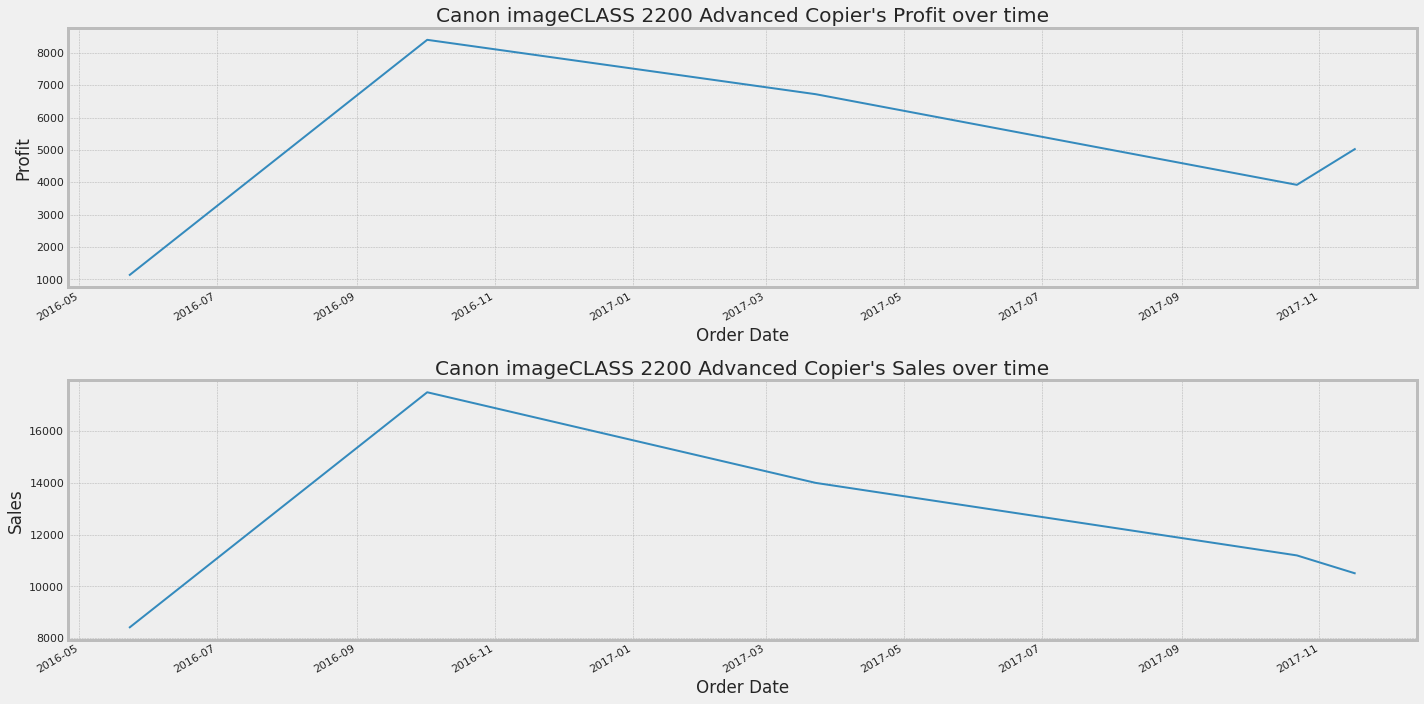

In [64]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
subset = dataframe[dataframe['Product Name']=='Canon imageCLASS 2200 Advanced Copier']
subset.set_index('Order Date')['Profit'].plot(ax=ax[0])
ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('Profit')
ax[0].set_title("Canon imageCLASS 2200 Advanced Copier's Profit over time")

subset.set_index('Order Date')['Sales'].plot(ax=ax[1])
ax[1].set_xlabel('Order Date')
ax[1].set_ylabel('Sales')
ax[1].set_title("Canon imageCLASS 2200 Advanced Copier's Sales over time")
fig.tight_layout()

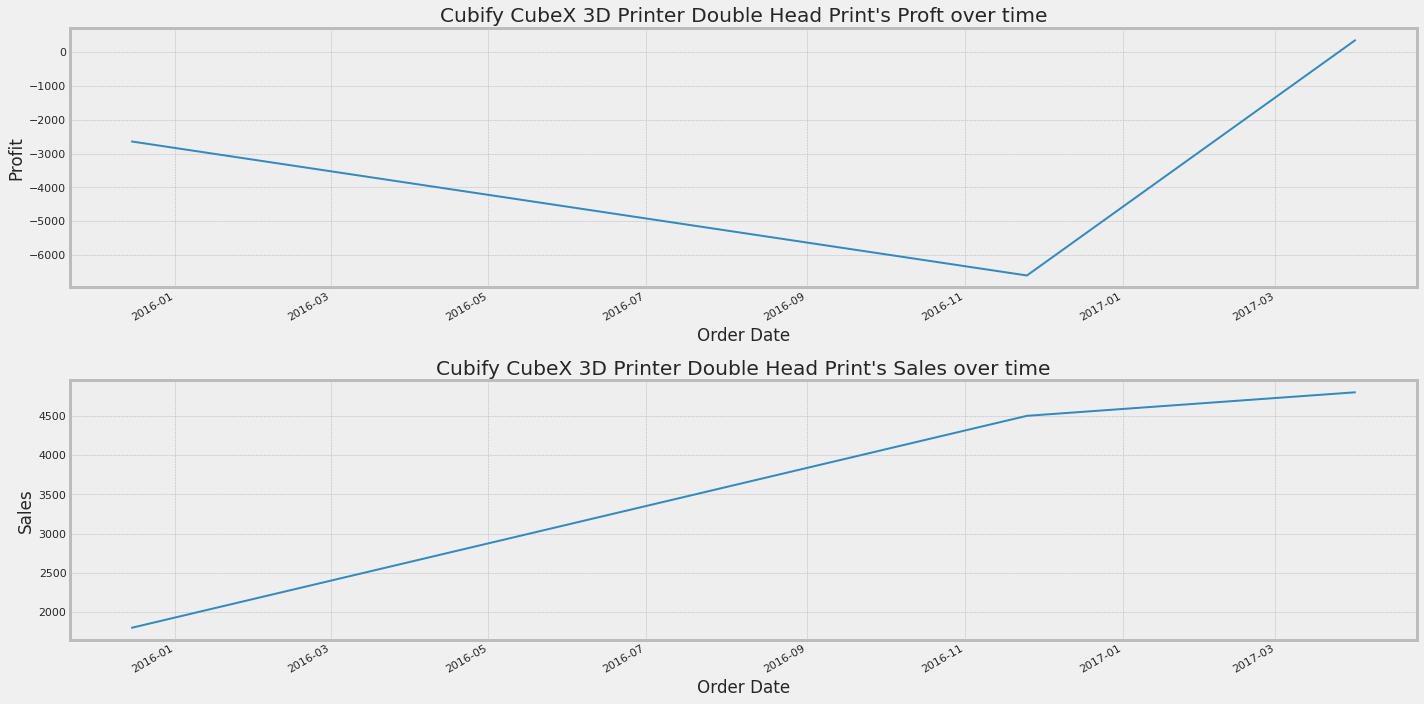

In [65]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
subset = dataframe[dataframe['Product Name']=='Cubify CubeX 3D Printer Double Head Print']
subset.set_index('Order Date')['Profit'].plot(ax=ax[0])
ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('Profit')
ax[0].set_title("Cubify CubeX 3D Printer Double Head Print's Proft over time")

subset.set_index('Order Date')['Sales'].plot(ax=ax[1])
ax[1].set_xlabel('Order Date')
ax[1].set_ylabel('Sales')
ax[1].set_title("Cubify CubeX 3D Printer Double Head Print's Sales over time")
fig.tight_layout()

#### Question: Which top 5 Cities are the Most Profitable for the superstore given the product category?

In [66]:
def city_profit(category):
    category_1 = dataframe[dataframe['Category'] == category]
    category_1.groupby('City')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='barh',title="Top 5 Cities that made the most profit in {}".format(category))

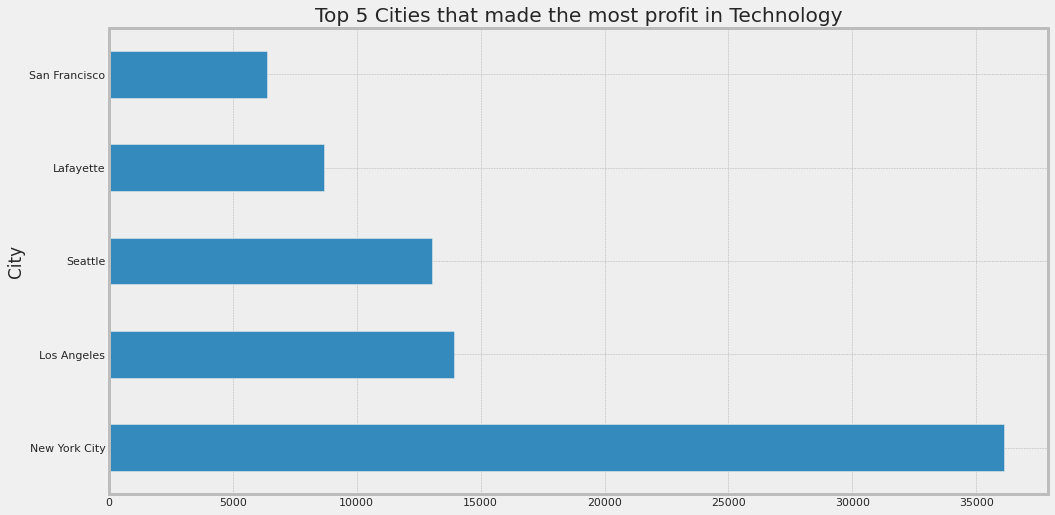

In [67]:
city_profit('Technology')

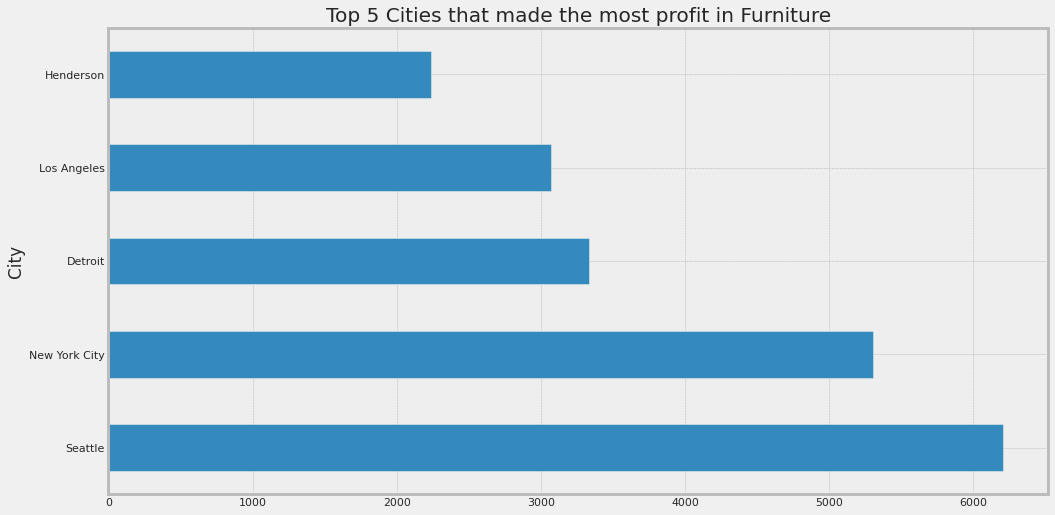

In [68]:
city_profit('Furniture')

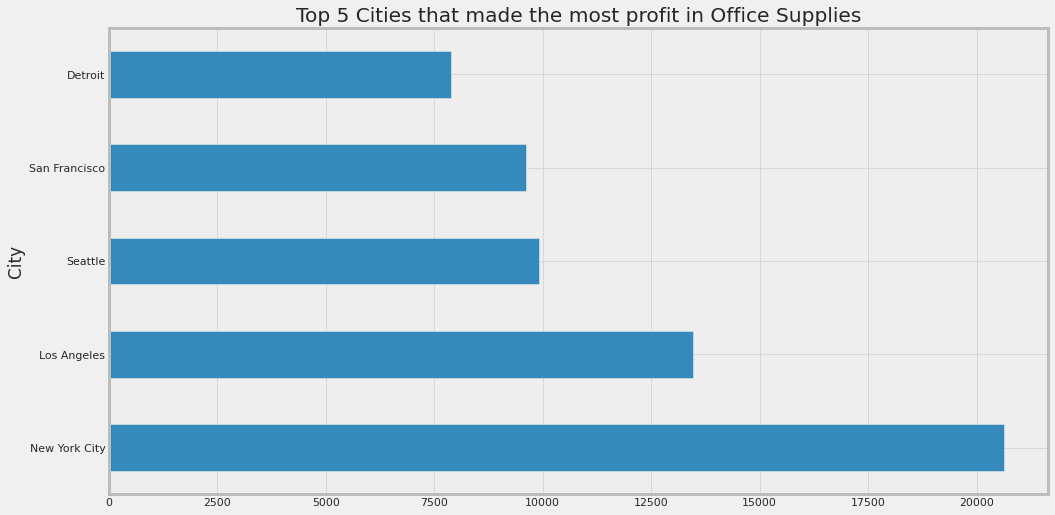

In [69]:
city_profit('Office Supplies')

#### Question: Let's see our customers who ordered the most products?

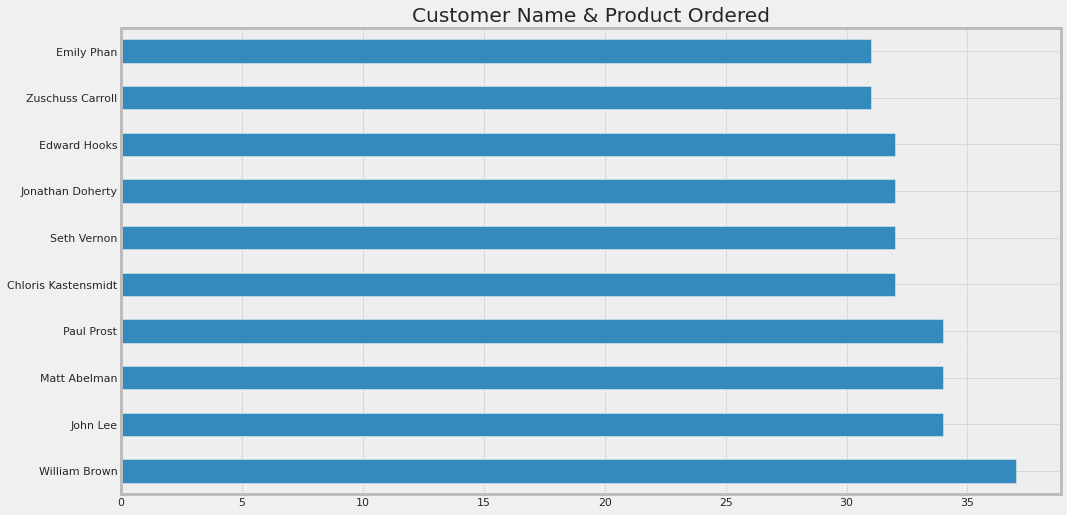

In [70]:
dataframe['Customer Name'].value_counts()[:10].plot(kind='barh',title='Customer Name & Product Ordered')

#### Question: Now which customers are the most profitable to the store?

In [71]:
dataframe.groupby(['Customer Name'])[['Profit','Sales','Quantity']].sum().sort_values(by='Profit',ascending=False)

,Profit,Sales,Quantity
Customer Name,,,
Tamara Chand,8981.3239,19052.218,42
Raymond Buch,6976.0959,15117.339,71
Sanjit Chand,5757.4119,14142.334,87
Hunter Lopez,5622.4292,12873.298,50
Adrian Barton,5444.8055,14473.571,73
...,...,...,...
Henry Goldwyn,-2797.9635,3247.642,68
Sharelle Roach,-3333.9144,3233.481,34
Luke Foster,-3583.9770,3930.509,69


#### Question: Now which customers are the most profitable to the store by Region?

In [72]:
dataframe.groupby(['Region','Customer Name'])[['Profit','Sales','Quantity']].sum().sort_values(by='Profit',ascending=False)

Profit      Sales  Quantity
Region  Customer Name                                 
Central Tamara Chand    8745.0635  18437.138        24
West    Raymond Buch    6807.0879  14345.276        23
Central Adrian Barton   5362.6135  12181.594        48
East    Hunter Lopez    5045.8564  10522.550         5
Central Sanjit Chand    4668.6935   9900.190        17
...                           ...        ...       ...
        Henry Goldwyn  -2930.8861   1890.866         6
West    Sharelle Roach -3424.3546   2613.309        22
Central Luke Foster    -3805.5490   2680.692        34
South   Grant Thornton -3825.3394   8167.420         6
East    Cindy Stewart  -6892.3748   5016.549        10

[2501 rows x 3 columns]

#### Question: Now which customers are the most profitable to the store and what Sub category of products generates so much?

In [73]:
dataframe.groupby(['Customer Name','Sub-Category'])[['Profit','Sales','Quantity']].sum().sort_values(by='Profit',ascending=False)

,,Profit,Sales,Quantity
Customer Name,Sub-Category,,,
Tamara Chand,Copiers,8399.9760,17499.950,5
Raymond Buch,Copiers,6719.9808,13999.960,4
Sanjit Chand,Binders,5549.1365,11468.166,22
Adrian Barton,Binders,5388.6829,11068.910,32
Hunter Lopez,Copiers,5039.9856,10499.970,3
...,...,...,...,...
Henry Goldwyn,Binders,-2933.2373,1946.814,12
Sharelle Roach,Machines,-3399.9800,2549.985,5
Luke Foster,Binders,-3742.0672,2203.248,17


#### Question: Now which customers are the most profitable to the store and what product and shipping mode did they order and use?

In [74]:
dataframe.groupby(['Customer Name','Ship Mode','Product Name'])[['Profit','Sales','Quantity']].sum().sort_values(by='Profit',ascending=False)

,,,Profit,Sales,Quantity
Customer Name,Ship Mode,Product Name,,,
Tamara Chand,Standard Class,Canon imageCLASS 2200 Advanced Copier,8399.9760,17499.950,5
Raymond Buch,First Class,Canon imageCLASS 2200 Advanced Copier,6719.9808,13999.960,4
Hunter Lopez,Standard Class,Canon imageCLASS 2200 Advanced Copier,5039.9856,10499.970,3
Adrian Barton,Standard Class,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700,9892.740,13
Sanjit Chand,Standard Class,Ibico EPK-21 Electric Binding System,4630.4755,9449.950,5
...,...,...,...,...,...
Henry Goldwyn,Standard Class,Ibico EPK-21 Electric Binding System,-2929.4845,1889.990,5
Sharelle Roach,Standard Class,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800,2549.985,5
Luke Foster,Standard Class,GBC DocuBind P400 Electric Binding System,-3701.8928,2177.584,8


#### Question: Which customers are contributing to the profits and losses most? Can you categorize them into customer segments?

In [75]:
profit = dataframe[dataframe['Profit']>0]
losses = dataframe[dataframe['Profit']<0]

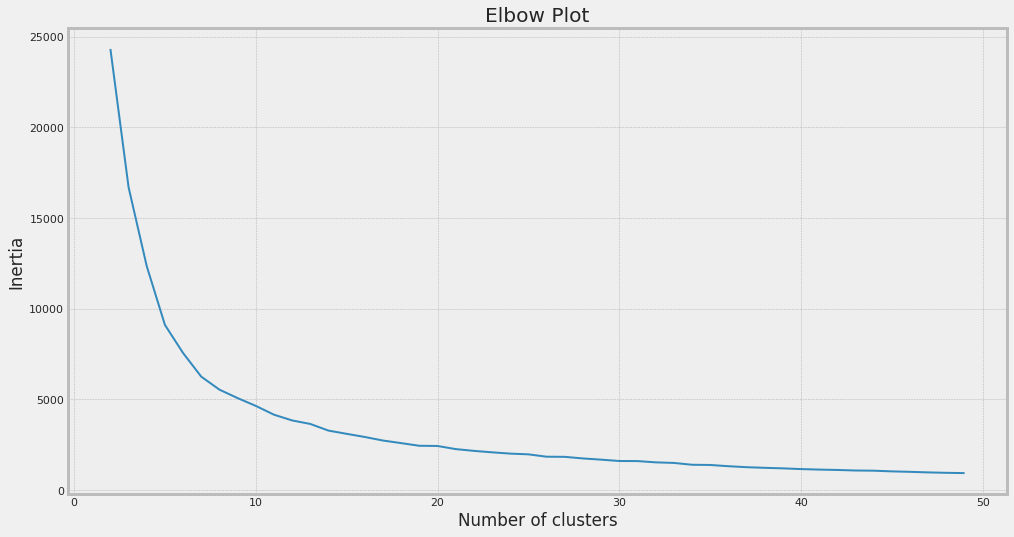

In [76]:


def find_optimal_clusters(df,clusters=50):
  df2 = df[numerical_variables].apply(lambda x:(x - x.mean())/x.std())
  sses = []

  for cl in range(2,clusters):
    kmeans = KMeans(n_clusters=cl,random_state=1,max_iter=1000)
    kmeans.fit(df2)
    sses.append(kmeans.inertia_)

  ax = sns.lineplot(x= range(2,clusters),y=sses)
  ax.set(xlabel='Number of clusters', ylabel='Inertia',title='Elbow Plot')

  return None



find_optimal_clusters(profit,clusters=50)

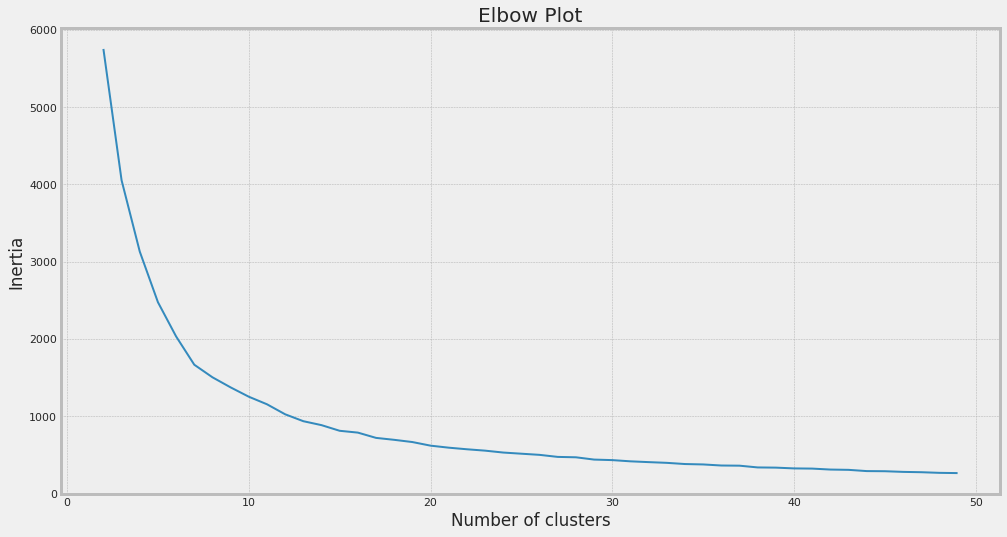

In [77]:
find_optimal_clusters(losses,clusters=50)

In [78]:

def fit_kmeans(df,clusters):
    df2 = df[numerical_variables].apply(lambda x:(x - x.mean())/x.std())
    kmeans = KMeans(n_clusters=clusters,random_state=1,max_iter=1000)
    kmeans.fit(df2)
    
    df['clusters']=kmeans.labels_

    fig = px.scatter(df, x="Sales", y="Profit", color="clusters",
                 size='Quantity', hover_data=['Customer Name','Discount'],
                 color_continuous_scale = px.colors.qualitative.G10)

    fig.show()

In [79]:
fit_kmeans(profit,6)

<ipython-input-78-7afeb5765d1c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
fit_kmeans(losses,4)

<ipython-input-78-7afeb5765d1c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
to_analyze = ['Sales','Profit','Quantity','Discount','clusters'] 
profit[to_analyze].groupby('clusters').agg([np.size,np.mean])

Sales               Profit              Quantity           Discount  \
          size          mean   size         mean     size      mean     size   
clusters                                                                       
0            9  10749.707556      9  4666.690833        9  5.666667        9   
1         2221    127.629885   2221    19.598863     2221  2.552904     2221   
2         1434    237.549858   1434    63.212101     1434  6.426778     1434   
3         3285    119.568793   3285    32.576199     3285  2.551903     3285   
4          937    250.673516    937    38.377198      937  6.597652      937   
5          172   2629.549122    172   717.329140      172  6.255814      172   

                    
              mean  
clusters            
0         0.022222  
1         0.201261  
2         0.001185  
3         0.001796  
4         0.200427  
5         0.060756

In [82]:

losses[to_analyze].groupby('clusters').agg([np.size,np.mean])

Sales              Profit              Quantity           Discount  \
          size         mean   size         mean     size      mean     size   
clusters                                                                      
0          806   272.607396    806   -43.795499      806  2.916873      806   
1          352   449.810763    352  -171.818343      352  7.153409      352   
2          701    36.185816    701   -38.809104      701  2.988588      701   
3           12  5440.495667     12 -2762.239542       12  6.333333       12   

                    
              mean  
clusters            
0         0.262370  
1         0.520085  
2         0.710699  
3         0.583333

#### Question: Does discount have anything to do with Losses in different regions across different product categories?

<ipython-input-83-b0db7ff67ca4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



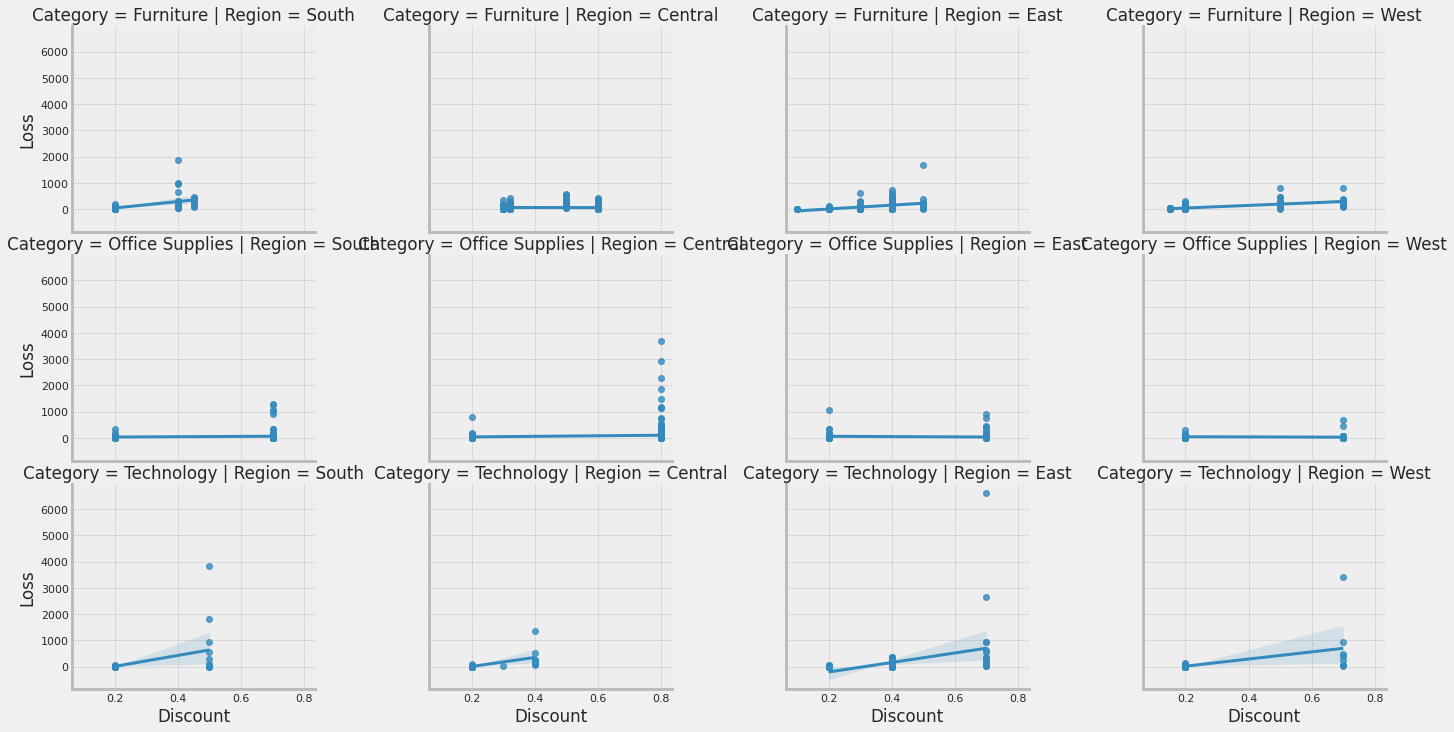

In [83]:
losses['Loss'] = -1*losses['Profit']
g = sns.lmplot(x = 'Discount',y='Loss',data = losses, col="Region", row="Category")
g.fig.set_size_inches(20, 10)

##### Let's Categorize data into the following using the median of each variable as the cut off or threshold:
* High Sales, High Profit, High Discount
* High Sales, Low Profit, High Discount
* Low Sales, Low Profit, High Discount
* Low Sales, High Profit, High Discount
* Low Sales, High Profit, Low Discount
* Low Sales, Low Profit, Low Discount

In [84]:
med_sales,med_prof,med_disc = dataframe['Sales'].median(),dataframe['Profit'].median(),dataframe['Discount'].median()

dataframe['Sales_Bins'] = np.where(dataframe['Sales']>=med_sales,'High-Sales','Low-Sales')
dataframe['Profit_Bins'] = np.where(dataframe['Profit']>=med_prof,'High-Profit','Low-Profit')
dataframe['Disc_Bins'] = np.where(dataframe['Discount']>=med_disc,'High-Discount','Low-Discount')

In [85]:
dataframe['category'] = dataframe['Sales_Bins'].astype(str)+"_"+dataframe['Profit_Bins'].astype(str)+"_"+dataframe['Disc_Bins'].astype(str)

#### Question: Given the sales,profit,discount categories see how many of them, given category/sub-category of products fall into each bucket?

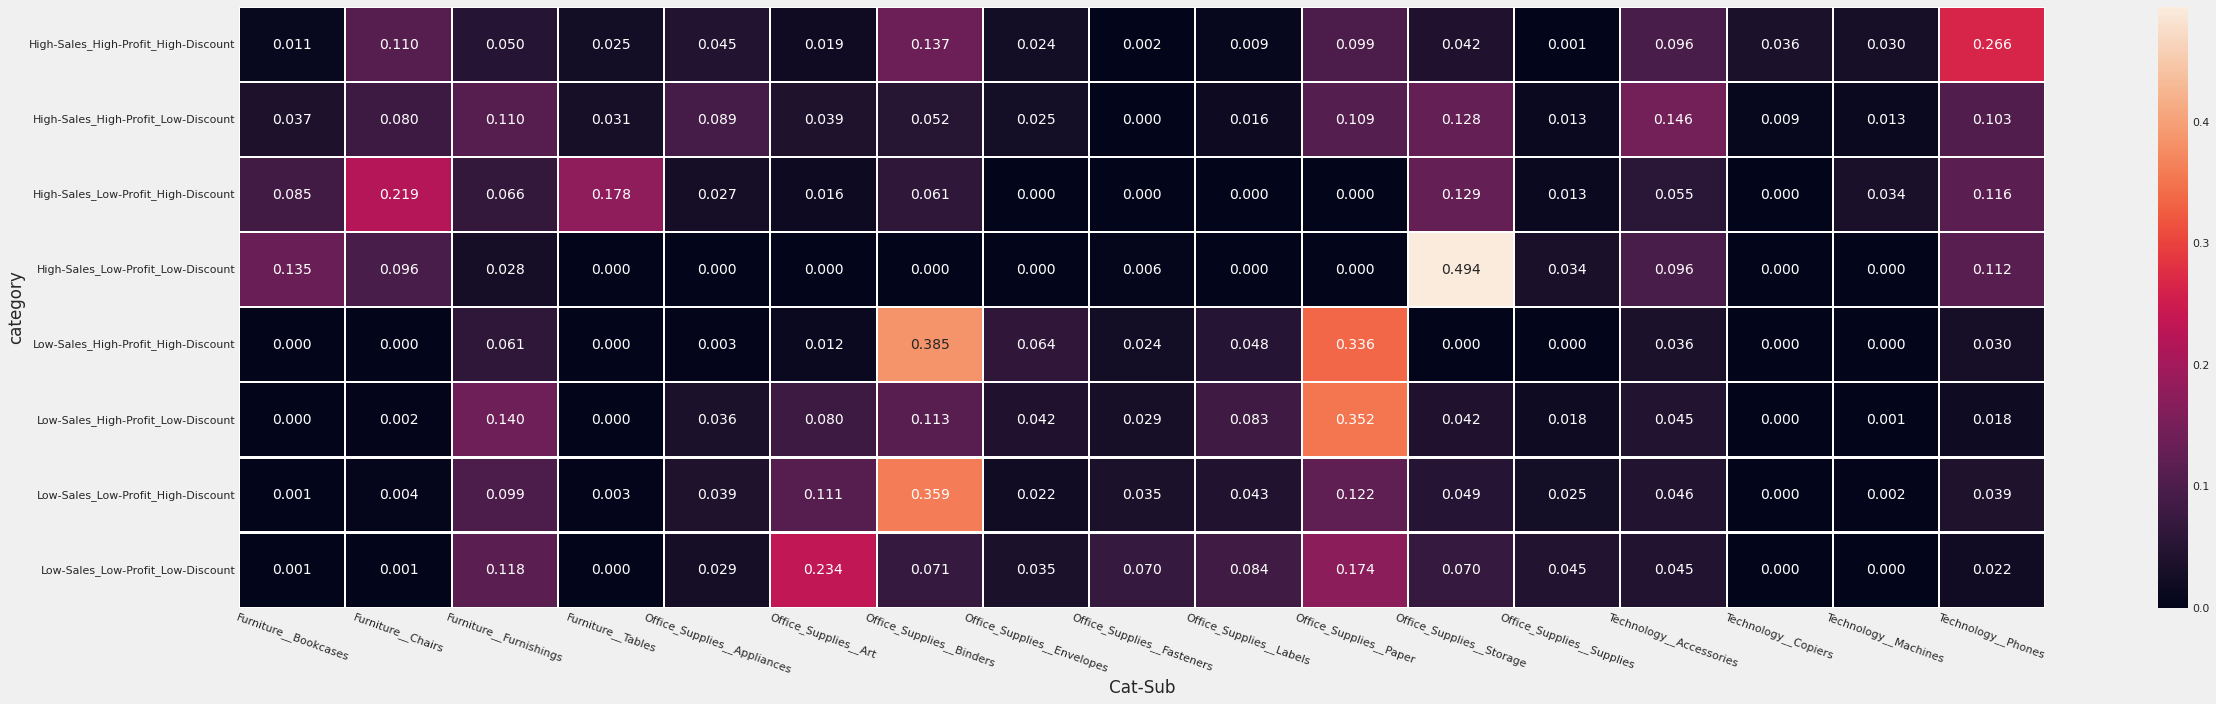

In [97]:
cross1 = pd.crosstab(dataframe['category'],dataframe['Cat-Sub'],normalize = 'index')

fig,ax = plt.subplots(figsize = (35,10))
sns.heatmap(cross1,annot=True,linewidth = 1.1,fmt = '1.3f',ax=ax)
ax.tick_params(axis='x', rotation=340)
fig.tight_layout()

#### Question: Given the sales,profit,discount categories see how many of them fall within a given Region?

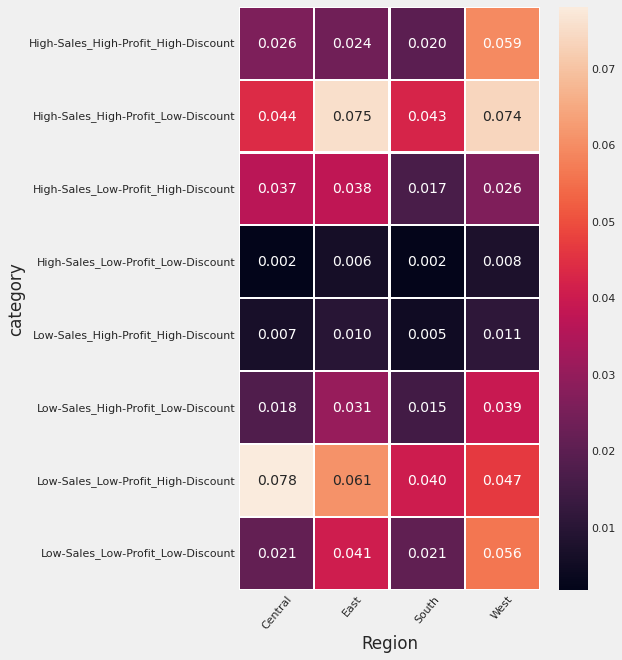

In [99]:
cross2= pd.crosstab(dataframe['category'],dataframe['Region'],normalize = True)

fig,ax = plt.subplots(figsize = (6,10))
sns.heatmap(cross2,annot=True,linewidth = 1.1,fmt = '1.3f',ax=ax)
ax.tick_params(axis='x', rotation=50)

## Insights:

* You see a nice distribution of categories amongst East and West, followed by Central but not as much  as with the south.

#### Question: Given the sales,profit,discount categories see how many of them fall into each segment?

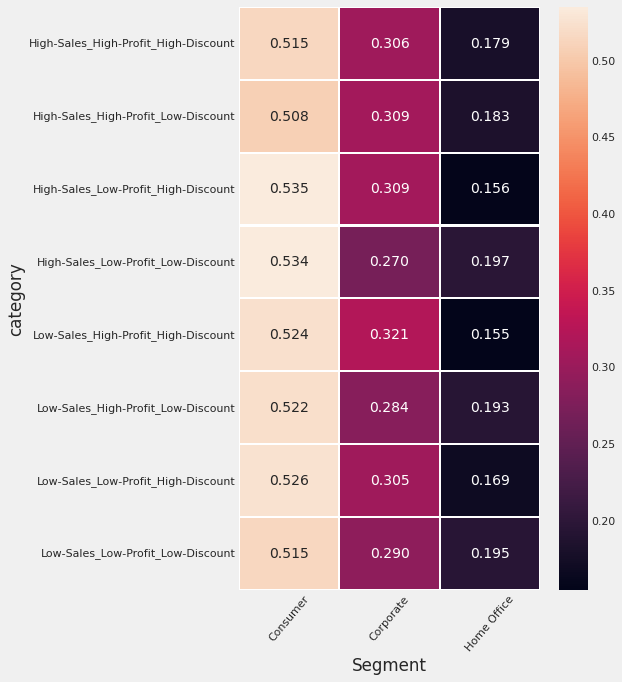

In [88]:
cross3= pd.crosstab(dataframe['category'],dataframe['Segment'],normalize = 'index')

fig,ax = plt.subplots(figsize = (6,10))
sns.heatmap(cross3,annot=True,linewidth = 1.1,fmt = '1.3f',ax=ax)
ax.tick_params(axis='x', rotation=50)

## Insights:

Normalized by category:
* Consumer segment do well across, home office not as much.

#### Question: Given the sales,profit,discount categories see how many of them within a specific shipping mode?

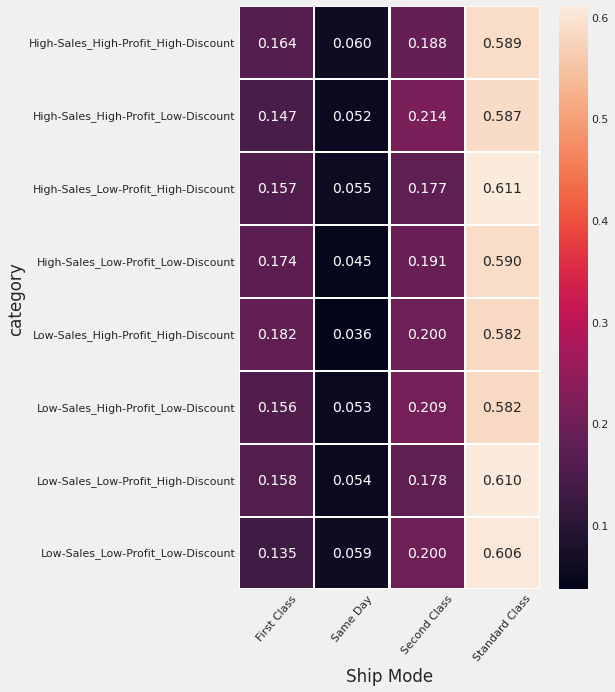

In [89]:
cross4= pd.crosstab(dataframe['category'],dataframe['Ship Mode'],normalize = 'index')

fig,ax = plt.subplots(figsize = (6,10))
sns.heatmap(cross4,annot=True,linewidth = 1.1,fmt = '1.3f',ax=ax)
ax.tick_params(axis='x', rotation=50)

## Insights:

Normalized by Category
* We see standard class of shipping mode dominating each category here.
* Same day has almost the same proportional distribution in each category 

#### Question: Given the sales,profit,discount categories see how many of them come from a specific state?

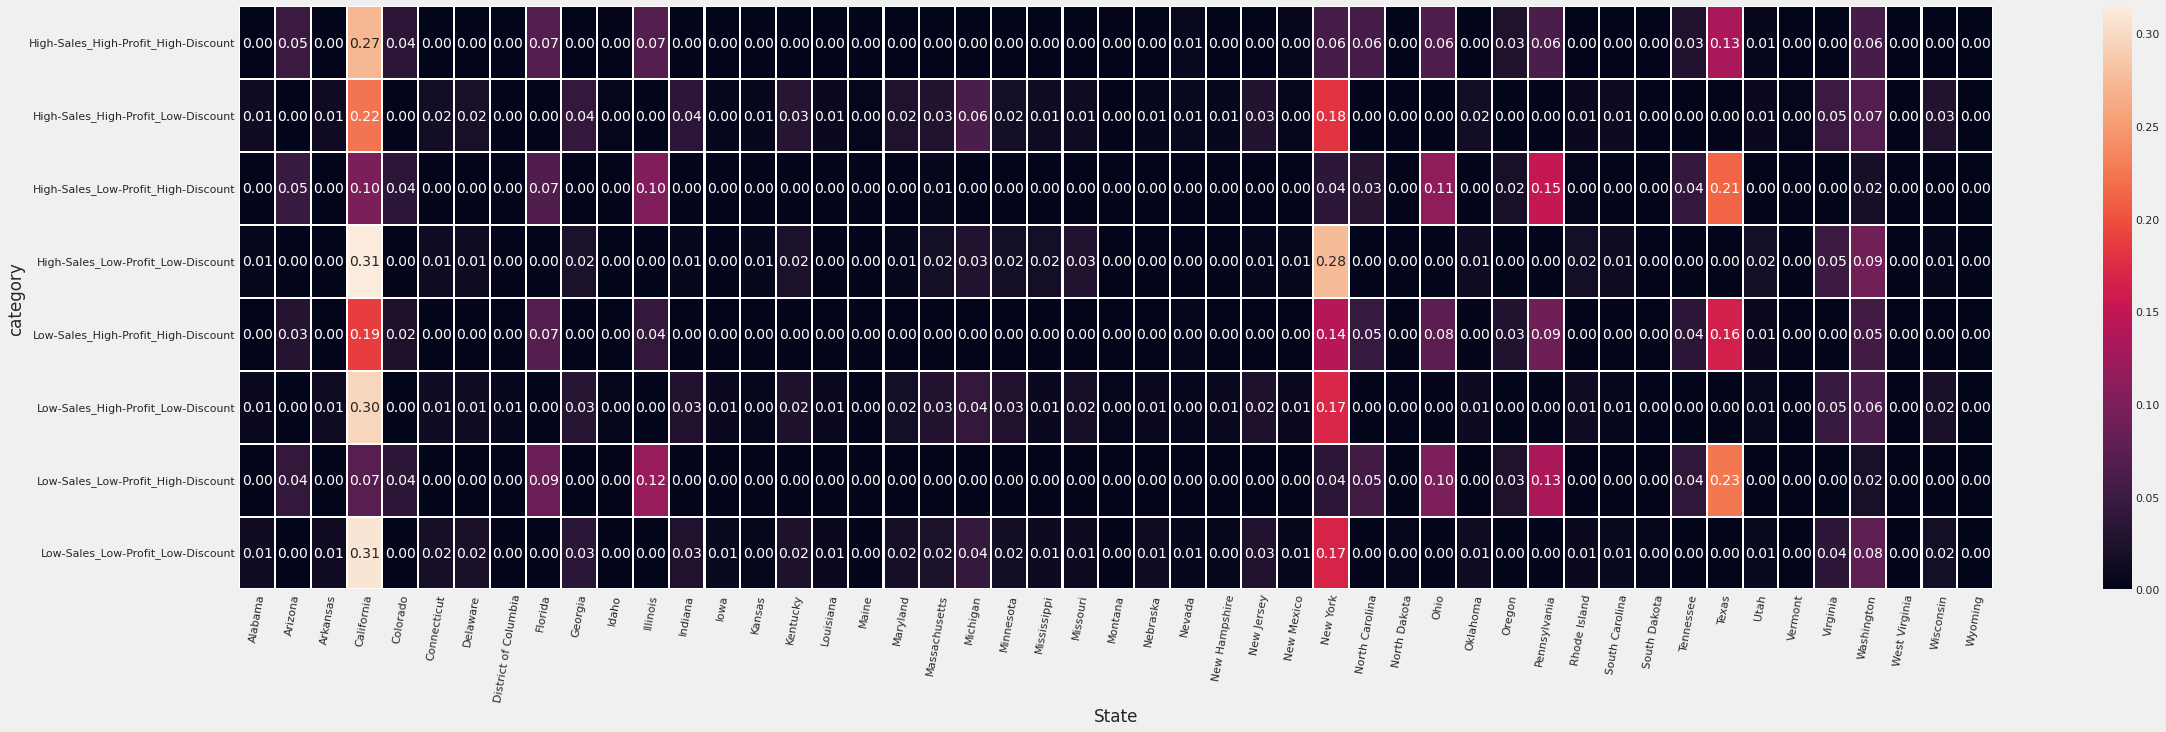

In [90]:
cross4= pd.crosstab(dataframe['category'],dataframe['State'],normalize = 'index')

fig,ax = plt.subplots(figsize = (35,10))
sns.heatmap(cross4,annot=True,linewidth = 1.1,fmt = '1.2f',ax=ax)
ax.tick_params(axis='x', rotation=80)

Insights:

Normalized by categories(index) - 
* In High sales, high profit, High discount category itself - California state is first with 27% of the share, followed by Texas with 13% of the share.
* In High sales, high profit, low discount category itself - California state has 22% of the share, followed by New York.
* In High sales, low profit, high discount category itself  - Texas has 21% of the share, folllowed by Pennsylvania.
* In High Sales, low profit, low discount category itself - Calforinia and New York share 50% of the share in total.
* In Low sales, high profit, high discount category itself - california, texas and new york in that order share almost 50%
* In Low sales, high profit, low discount - california and then new york
* In low sales, low profit, high discount - Texas, Penn, Illinois and Ohio.
* In low sales, low profit, low discount - california, new york.







You can also have a look at this slide deck of insights by Analyst2:

https://analyst-2.ai/analysis/kaggle-sample-superstore-dataset-74ac/9e9cb9c7/

*Note: They haven't used python completely here for analysis.*

